### Device + Imports

In [138]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from skimage import img_as_ubyte
import cv2


device = torch.device('cpu')

# if torch.cuda.is_available():
#     device = torch.device('cuda:0')
    
print(device)

cpu


### Import Models + Load Weights

In [139]:
from Generator import Generator
from Classifier import Classifier
from Discriminator import Discriminator

In [140]:
gen = Generator().to(device)
discr = Discriminator().to(device)
classifier = Classifier().to(device)


gen.load_state_dict(torch.load('generator_weights.pytorch', map_location = device))
discr.load_state_dict(torch.load('discriminator_weights.pytorch', map_location = device))
classifier.load_state_dict(torch.load('classifier_weights.pytorch', map_location = device))
#gen.eval()
classifier.eval()

Classifier(
  (features): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (1): ReLU()
    (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.2, inplace=False)
    (5): Conv2d(16, 32, kernel_size=(6, 6), stride=(1, 1), bias=False)
    (6): ReLU()
    (7): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Dropout(p=0.2, inplace=False)
    (10): Conv2d(32, 32, kernel_size=(6, 6), stride=(1, 1), bias=False)
    (11): ReLU()
    (12): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Dropout(p=0.2, inplace=False)
  )
  (clf): Sequential(
    (0): Linear(in_features=512, out

### Load Example Image and Reconstruct

In [141]:
class SquashTransform:

    def __call__(self, inputs):
        return 2 * inputs - 1
    
data_test = torchvision.datasets.ImageFolder(
    './ex_image',
    transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Resize((64, 64)),
        SquashTransform()
    ])
)
test_loader = torch.utils.data.DataLoader(
    data_test,
    batch_size=1,
    shuffle=False,
    num_workers=0
)

Classification:[0.3502792  0.64972085]


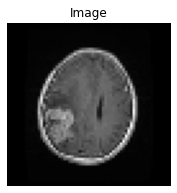

In [142]:
image = next(iter(test_loader))


classifier.eval()
plt.figure(figsize=(3, 3))
plt.axis("off")
plt.title("Image")

plt.imshow(
    np.transpose(
        torchvision.utils.make_grid(
            image[0].to(device),
            padding=10,
            normalize=True,
            pad_value=1,
        ).cpu(),
        (1,2,0)
    )
);


clf, _ = classifier(image[0].to(device))
print("Classification:" + str(clf.detach().numpy()[0]))


In [143]:
from torch.autograd import Variable

init_noisez1 = Variable(torch.randn(
    1, 1000
).to(device), requires_grad = True)

init_noisez2 = Variable(torch.randn(
    1, 100
).to(device), requires_grad = True)

optim = torch.optim.Adam([init_noisez1, init_noisez2], lr=0.001, betas=(0.5, 0.999))  

### 1

E: 1 loss: 8.776473045349121
E: 2 loss: 8.121400833129883
E: 3 loss: 7.43122673034668
E: 4 loss: 6.883795261383057
E: 5 loss: 6.4289045333862305
E: 6 loss: 5.883802890777588
E: 7 loss: 5.485372066497803
E: 8 loss: 4.942258358001709
E: 9 loss: 4.41422700881958
E: 10 loss: 4.504680156707764
E: 11 loss: 4.444289207458496
E: 12 loss: 4.411276340484619
E: 13 loss: 4.41874885559082
E: 14 loss: 4.409881591796875
E: 15 loss: 4.404890060424805
E: 16 loss: 4.399355411529541
E: 17 loss: 4.397610664367676
E: 18 loss: 4.395023822784424
E: 19 loss: 4.3922438621521
E: 20 loss: 4.389355659484863
E: 21 loss: 4.38685417175293
E: 22 loss: 4.3840179443359375
E: 23 loss: 4.381649017333984
E: 24 loss: 4.37935209274292
E: 25 loss: 4.377233982086182
E: 26 loss: 4.375320911407471
E: 27 loss: 4.372562408447266
E: 28 loss: 4.3674445152282715
E: 29 loss: 4.358597755432129
E: 30 loss: 4.349524974822998
E: 31 loss: 4.341310024261475
E: 32 loss: 4.332019329071045
E: 33 loss: 4.322632312774658
E: 34 loss: 4.312408447

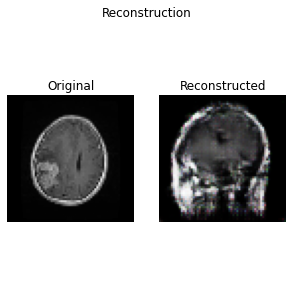

E: 101 loss: 3.6652066707611084
E: 102 loss: 3.65523624420166
E: 103 loss: 3.64727520942688
E: 104 loss: 3.638908863067627
E: 105 loss: 3.629251480102539
E: 106 loss: 3.6195168495178223
E: 107 loss: 3.6085174083709717
E: 108 loss: 3.598367929458618
E: 109 loss: 3.5899760723114014
E: 110 loss: 3.582706928253174
E: 111 loss: 3.5775880813598633
E: 112 loss: 3.5707430839538574
E: 113 loss: 3.562065601348877
E: 114 loss: 3.5569658279418945
E: 115 loss: 3.552582025527954
E: 116 loss: 3.5481011867523193
E: 117 loss: 3.5431971549987793
E: 118 loss: 3.536362886428833
E: 119 loss: 3.528749704360962
E: 120 loss: 3.5209667682647705
E: 121 loss: 3.51499605178833
E: 122 loss: 3.5103869438171387
E: 123 loss: 3.508139133453369
E: 124 loss: 3.5059871673583984
E: 125 loss: 3.5031769275665283
E: 126 loss: 3.500577926635742
E: 127 loss: 3.4996488094329834
E: 128 loss: 3.4973487854003906
E: 129 loss: 3.4945907592773438
E: 130 loss: 3.4917895793914795
E: 131 loss: 3.487764596939087
E: 132 loss: 3.4820377826

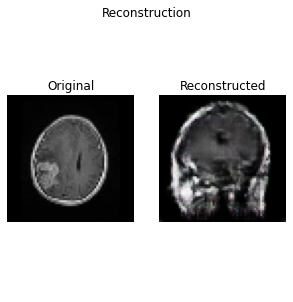

E: 201 loss: 3.415200710296631
E: 202 loss: 3.4150776863098145
E: 203 loss: 3.414374589920044
E: 204 loss: 3.413966178894043
E: 205 loss: 3.4137346744537354
E: 206 loss: 3.413734197616577
E: 207 loss: 3.412984848022461
E: 208 loss: 3.412506341934204
E: 209 loss: 3.412356376647949
E: 210 loss: 3.412175416946411
E: 211 loss: 3.411390781402588
E: 212 loss: 3.411182403564453
E: 213 loss: 3.411000967025757
E: 214 loss: 3.410229206085205
E: 215 loss: 3.4097752571105957
E: 216 loss: 3.4095213413238525
E: 217 loss: 3.4090471267700195
E: 218 loss: 3.4087178707122803
E: 219 loss: 3.4082071781158447
E: 220 loss: 3.4077084064483643
E: 221 loss: 3.407193183898926
E: 222 loss: 3.406644344329834
E: 223 loss: 3.405946731567383
E: 224 loss: 3.405426263809204
E: 225 loss: 3.404773712158203
E: 226 loss: 3.4039735794067383
E: 227 loss: 3.403029203414917
E: 228 loss: 3.4021453857421875
E: 229 loss: 3.401273727416992
E: 230 loss: 3.4002628326416016
E: 231 loss: 3.399416446685791
E: 232 loss: 3.3985269069671

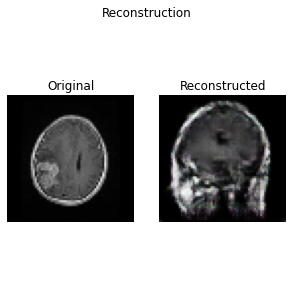

E: 301 loss: 3.3066365718841553
E: 302 loss: 3.305563449859619
E: 303 loss: 3.304434299468994
E: 304 loss: 3.3033156394958496
E: 305 loss: 3.302201747894287
E: 306 loss: 3.301044464111328
E: 307 loss: 3.3000035285949707
E: 308 loss: 3.299099922180176
E: 309 loss: 3.2974414825439453
E: 310 loss: 3.2960898876190186
E: 311 loss: 3.2942888736724854
E: 312 loss: 3.2931268215179443
E: 313 loss: 3.2916347980499268
E: 314 loss: 3.289952278137207
E: 315 loss: 3.2882421016693115
E: 316 loss: 3.286363124847412
E: 317 loss: 3.2849364280700684
E: 318 loss: 3.2842376232147217
E: 319 loss: 3.2817084789276123
E: 320 loss: 3.281221866607666
E: 321 loss: 3.2804179191589355
E: 322 loss: 3.277797222137451
E: 323 loss: 3.277662754058838
E: 324 loss: 3.2774884700775146
E: 325 loss: 3.2742409706115723
E: 326 loss: 3.2730534076690674
E: 327 loss: 3.2726845741271973
E: 328 loss: 3.2723875045776367
E: 329 loss: 3.2721614837646484
E: 330 loss: 3.26938533782959
E: 331 loss: 3.2680814266204834
E: 332 loss: 3.26737

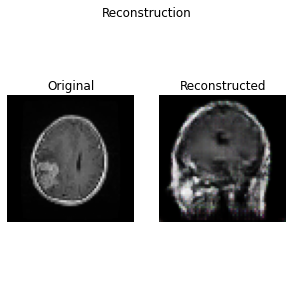

E: 401 loss: 3.205949544906616
E: 402 loss: 3.2051455974578857
E: 403 loss: 3.2044332027435303
E: 404 loss: 3.203765392303467
E: 405 loss: 3.2031326293945312
E: 406 loss: 3.2027182579040527
E: 407 loss: 3.20231032371521
E: 408 loss: 3.201996326446533
E: 409 loss: 3.2017364501953125
E: 410 loss: 3.200369358062744
E: 411 loss: 3.199902057647705
E: 412 loss: 3.1991426944732666
E: 413 loss: 3.198751926422119
E: 414 loss: 3.1987667083740234
E: 415 loss: 3.197782516479492
E: 416 loss: 3.197235584259033
E: 417 loss: 3.196570634841919
E: 418 loss: 3.1962368488311768
E: 419 loss: 3.195918083190918
E: 420 loss: 3.1946914196014404
E: 421 loss: 3.194681167602539
E: 422 loss: 3.1936416625976562
E: 423 loss: 3.1926651000976562
E: 424 loss: 3.192068099975586
E: 425 loss: 3.1914141178131104
E: 426 loss: 3.1904830932617188
E: 427 loss: 3.1898036003112793
E: 428 loss: 3.189274787902832
E: 429 loss: 3.1886024475097656
E: 430 loss: 3.187976837158203
E: 431 loss: 3.1872849464416504
E: 432 loss: 3.186427354

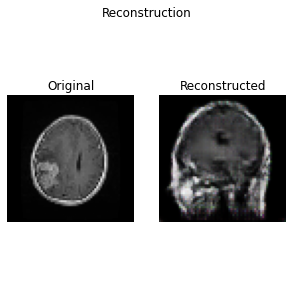

E: 501 loss: 3.118184804916382
E: 502 loss: 3.117501735687256
E: 503 loss: 3.11702299118042
E: 504 loss: 3.116363286972046
E: 505 loss: 3.1157612800598145
E: 506 loss: 3.115142345428467
E: 507 loss: 3.1147804260253906
E: 508 loss: 3.114198684692383
E: 509 loss: 3.115083694458008
E: 510 loss: 3.115140914916992
E: 511 loss: 3.112863063812256
E: 512 loss: 3.1123290061950684
E: 513 loss: 3.1130759716033936
E: 514 loss: 3.111920118331909
E: 515 loss: 3.1110522747039795
E: 516 loss: 3.1103384494781494
E: 517 loss: 3.1101841926574707
E: 518 loss: 3.1096062660217285
E: 519 loss: 3.1087965965270996
E: 520 loss: 3.1082677841186523
E: 521 loss: 3.107840061187744
E: 522 loss: 3.1076622009277344
E: 523 loss: 3.107201099395752
E: 524 loss: 3.1070828437805176
E: 525 loss: 3.1071670055389404
E: 526 loss: 3.1060478687286377
E: 527 loss: 3.1056337356567383
E: 528 loss: 3.1051619052886963
E: 529 loss: 3.104360580444336
E: 530 loss: 3.1038711071014404
E: 531 loss: 3.1034960746765137
E: 532 loss: 3.1033880

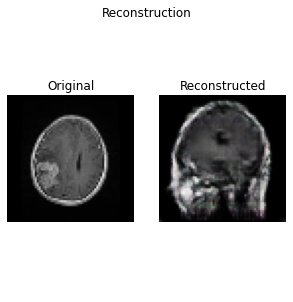

E: 601 loss: 3.102125406265259
E: 602 loss: 3.1058995723724365
E: 603 loss: 3.102339744567871
E: 604 loss: 3.106269121170044
E: 605 loss: 3.101616144180298
E: 606 loss: 3.1046199798583984
E: 607 loss: 3.099994659423828
E: 608 loss: 3.1026949882507324
E: 609 loss: 3.0992956161499023
E: 610 loss: 3.102670192718506
E: 611 loss: 3.0987517833709717
E: 612 loss: 3.102116584777832
E: 613 loss: 3.097475051879883
E: 614 loss: 3.100332260131836
E: 615 loss: 3.096531867980957
E: 616 loss: 3.0998659133911133
E: 617 loss: 3.093996047973633
E: 618 loss: 3.0962979793548584
E: 619 loss: 3.091360330581665
E: 620 loss: 3.0927302837371826
E: 621 loss: 3.090287208557129
E: 622 loss: 3.092623472213745
E: 623 loss: 3.0894079208374023
E: 624 loss: 3.0913610458374023
E: 625 loss: 3.0883867740631104
E: 626 loss: 3.090430736541748
E: 627 loss: 3.0899391174316406
E: 628 loss: 3.095583438873291
E: 629 loss: 3.1081199645996094
E: 630 loss: 3.1350817680358887
E: 631 loss: 3.1143417358398438
E: 632 loss: 3.121943473

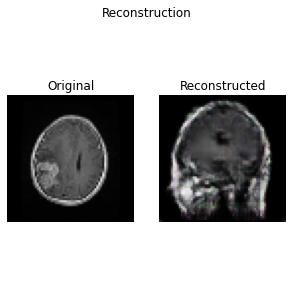

E: 701 loss: 3.1050467491149902
E: 702 loss: 3.1215109825134277
E: 703 loss: 3.0917248725891113
E: 704 loss: 3.0932531356811523
E: 705 loss: 3.091897964477539
E: 706 loss: 3.1038658618927
E: 707 loss: 3.104706287384033
E: 708 loss: 3.1213412284851074
E: 709 loss: 3.0836668014526367
E: 710 loss: 3.081676483154297
E: 711 loss: 3.085808753967285
E: 712 loss: 3.103544235229492
E: 713 loss: 3.106529712677002
E: 714 loss: 3.120281219482422
E: 715 loss: 3.0857653617858887
E: 716 loss: 3.0827221870422363
E: 717 loss: 3.0773799419403076
E: 718 loss: 3.0786755084991455
E: 719 loss: 3.080083131790161
E: 720 loss: 3.0880074501037598
E: 721 loss: 3.0894174575805664
E: 722 loss: 3.100104808807373
E: 723 loss: 3.091970443725586
E: 724 loss: 3.0979163646698
E: 725 loss: 3.0898025035858154
E: 726 loss: 3.0951004028320312
E: 727 loss: 3.0896832942962646
E: 728 loss: 3.095081090927124
E: 729 loss: 3.091456651687622
E: 730 loss: 3.095754623413086
E: 731 loss: 3.090132236480713
E: 732 loss: 3.0921068191528

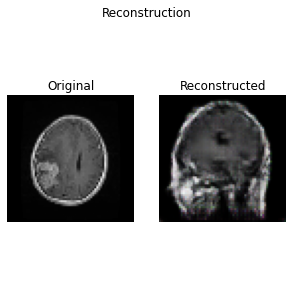

E: 801 loss: 3.077963352203369
E: 802 loss: 3.077995777130127
E: 803 loss: 3.087207317352295
E: 804 loss: 3.075228691101074
E: 805 loss: 3.0760560035705566
E: 806 loss: 3.0806307792663574
E: 807 loss: 3.0902209281921387
E: 808 loss: 3.0781826972961426
E: 809 loss: 3.0785250663757324
E: 810 loss: 3.0810580253601074
E: 811 loss: 3.090226173400879
E: 812 loss: 3.0766525268554688
E: 813 loss: 3.072627305984497
E: 814 loss: 3.070049285888672
E: 815 loss: 3.0677037239074707
E: 816 loss: 3.0617990493774414
E: 817 loss: 3.0601181983947754
E: 818 loss: 3.060030460357666
E: 819 loss: 3.061099052429199
E: 820 loss: 3.0664706230163574
E: 821 loss: 3.0826399326324463
E: 822 loss: 3.0798587799072266
E: 823 loss: 3.0976240634918213
E: 824 loss: 3.0683822631835938
E: 825 loss: 3.06734037399292
E: 826 loss: 3.069939613342285
E: 827 loss: 3.084062099456787
E: 828 loss: 3.075279712677002
E: 829 loss: 3.0865156650543213
E: 830 loss: 3.0756680965423584
E: 831 loss: 3.0834298133850098
E: 832 loss: 3.0719611

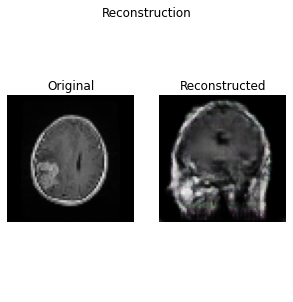

E: 901 loss: 3.0473787784576416
E: 902 loss: 3.047302722930908
E: 903 loss: 3.047205924987793
E: 904 loss: 3.047072172164917
E: 905 loss: 3.046926259994507
E: 906 loss: 3.046834707260132
E: 907 loss: 3.046761989593506
E: 908 loss: 3.0467898845672607
E: 909 loss: 3.047147750854492
E: 910 loss: 3.0474393367767334
E: 911 loss: 3.04875111579895
E: 912 loss: 3.050804615020752
E: 913 loss: 3.055227279663086
E: 914 loss: 3.047886610031128
E: 915 loss: 3.04636812210083
E: 916 loss: 3.045839309692383
E: 917 loss: 3.0458333492279053
E: 918 loss: 3.0456695556640625
E: 919 loss: 3.045623302459717
E: 920 loss: 3.0469441413879395
E: 921 loss: 3.0508458614349365
E: 922 loss: 3.0525598526000977
E: 923 loss: 3.0574655532836914
E: 924 loss: 3.0473439693450928
E: 925 loss: 3.0455455780029297
E: 926 loss: 3.0447654724121094
E: 927 loss: 3.0444064140319824
E: 928 loss: 3.044313907623291
E: 929 loss: 3.0446603298187256
E: 930 loss: 3.046253204345703
E: 931 loss: 3.0519309043884277
E: 932 loss: 3.05120754241

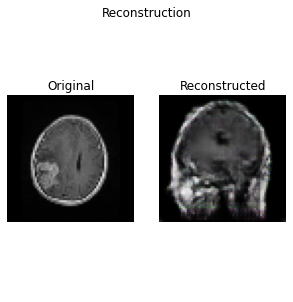

In [144]:
for epoch in range(0,1000):
    image = next(iter(test_loader))
    original_image = image[0][0]
    optim.zero_grad()
    sample = gen(init_noisez1,init_noisez2 ).to(device)
    sample = (sample.reshape([1,3,64,64]))
    result,_ = classifier(sample) 
    prob = result[0,1]
    clf, _ = classifier(image[0].to(device))
    
    class_loss = torch.nn.BCELoss()(prob, clf[0,1])
    
    
    original_image =  (original_image.reshape([1,3,64,64]))
    

    loss = 10*torch.mean((original_image - sample)**2) + class_loss

    
    print("E:", epoch+1, "loss:", loss.item())
    loss.backward()
    optim.step()
    
    if (epoch+1) % 100 == 0:
        reconstructed_image = gen(
        init_noisez1, init_noisez2
        ).detach().cpu().view(-1, 3,64, 64)
        
        reconstructed_image = reconstructed_image[0,]
        
        print(result)
        fig=plt.figure(figsize=(5, 5))
        plt.title('Reconstruction')
        plt.axis('off')




        minifig= fig.add_subplot(1, 2, 1)
        minifig.axis('off')
        minifig.title.set_text('Original' )
        original_image = original_image.cpu().view(3, 64, 64)
        original_image = (np.transpose(original_image,(1,2,0))+1)/2
        original_image = (original_image)
        plt.imshow(original_image)


        minifig= fig.add_subplot(1, 2, 2)
        minifig.title.set_text('Reconstructed')
        minifig.axis('off')
        reconstructed_image = np.transpose(reconstructed_image,(1,2,0))
        reconstructed_image = (reconstructed_image + 1)/2
        plt.imshow(reconstructed_image)

        plt.show()

Classification:[0.3502792  0.64972085]


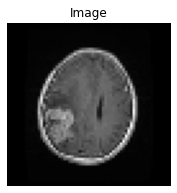

In [145]:
data_test = torchvision.datasets.ImageFolder(
    './ex_image',
    transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        #torchvision.transforms.Resize((32, 32)),
        torchvision.transforms.Resize((64, 64)),
        SquashTransform()
    ])
)
test_loader = torch.utils.data.DataLoader(
    data_test,
    batch_size=1,
    shuffle=False,
    num_workers=0
)

image = next(iter(test_loader))


classifier.eval()
plt.figure(figsize=(3, 3))
plt.axis("off")
plt.title("Image")

plt.imshow(
    np.transpose(
        torchvision.utils.make_grid(
            image[0].to(device),
            padding=10,
            normalize=True,
            pad_value=1,
        ).cpu(),
        (1,2,0)
    )
);


clf, _ = classifier(image[0].to(device))
print("Classification:" + str(clf.detach().numpy()[0]))


### 2

E: 1
tensor([[0.0126, 0.9874]], grad_fn=<SoftmaxBackward0>)
tensor([[0.9982, 0.0018]], grad_fn=<SoftmaxBackward0>)


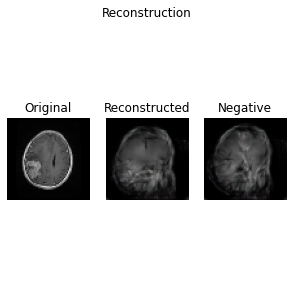

E: 2
tensor([[0.9926, 0.0074]], grad_fn=<SoftmaxBackward0>)
tensor([[0.9976, 0.0024]], grad_fn=<SoftmaxBackward0>)


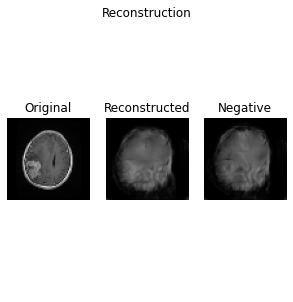

E: 3
tensor([[0.6271, 0.3729]], grad_fn=<SoftmaxBackward0>)
tensor([[0.2008, 0.7992]], grad_fn=<SoftmaxBackward0>)


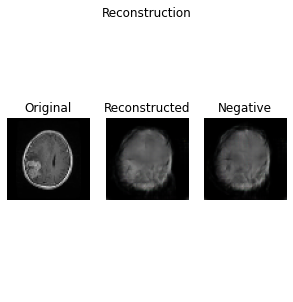

E: 4
tensor([[0.0191, 0.9809]], grad_fn=<SoftmaxBackward0>)
tensor([[0.0054, 0.9946]], grad_fn=<SoftmaxBackward0>)


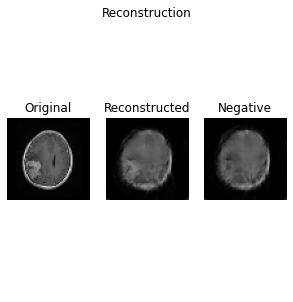

E: 5
tensor([[5.3001e-04, 9.9947e-01]], grad_fn=<SoftmaxBackward0>)
tensor([[1.9524e-04, 9.9980e-01]], grad_fn=<SoftmaxBackward0>)


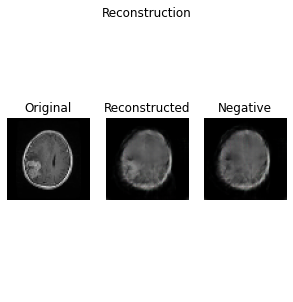

E: 6
tensor([[1.4366e-04, 9.9986e-01]], grad_fn=<SoftmaxBackward0>)
tensor([[2.9718e-05, 9.9997e-01]], grad_fn=<SoftmaxBackward0>)


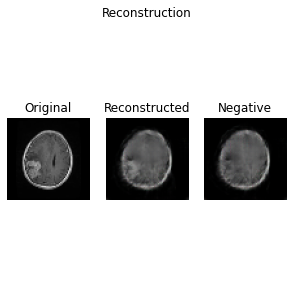

E: 7
tensor([[1.6839e-05, 9.9998e-01]], grad_fn=<SoftmaxBackward0>)
tensor([[9.3501e-06, 9.9999e-01]], grad_fn=<SoftmaxBackward0>)


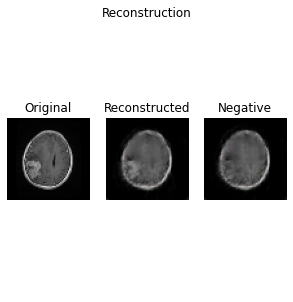

E: 8
tensor([[1.3792e-05, 9.9999e-01]], grad_fn=<SoftmaxBackward0>)
tensor([[9.5615e-06, 9.9999e-01]], grad_fn=<SoftmaxBackward0>)


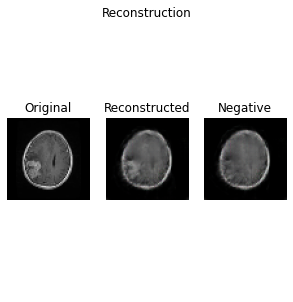

E: 9
tensor([[7.2217e-06, 9.9999e-01]], grad_fn=<SoftmaxBackward0>)
tensor([[5.8395e-06, 9.9999e-01]], grad_fn=<SoftmaxBackward0>)


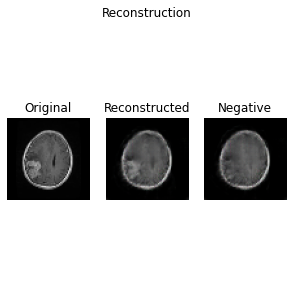

E: 10
tensor([[3.3178e-05, 9.9997e-01]], grad_fn=<SoftmaxBackward0>)
tensor([[6.9249e-05, 9.9993e-01]], grad_fn=<SoftmaxBackward0>)


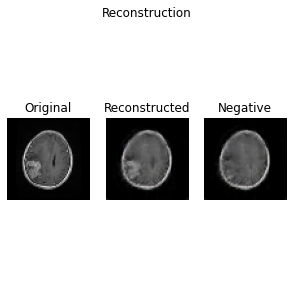

E: 11
tensor([[1.9474e-05, 9.9998e-01]], grad_fn=<SoftmaxBackward0>)
tensor([[2.8822e-05, 9.9997e-01]], grad_fn=<SoftmaxBackward0>)


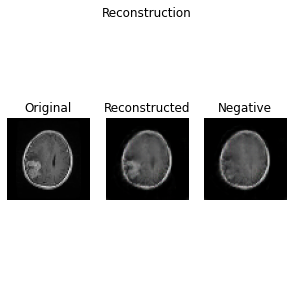

E: 12
tensor([[1.4702e-05, 9.9999e-01]], grad_fn=<SoftmaxBackward0>)
tensor([[2.1079e-05, 9.9998e-01]], grad_fn=<SoftmaxBackward0>)


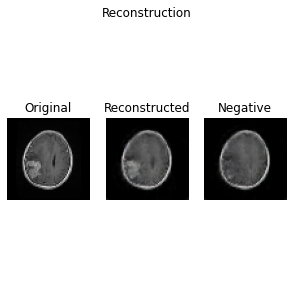

E: 13
tensor([[0.0011, 0.9989]], grad_fn=<SoftmaxBackward0>)
tensor([[0.0016, 0.9984]], grad_fn=<SoftmaxBackward0>)


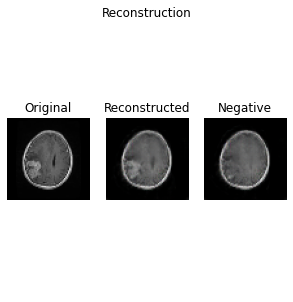

E: 14
tensor([[7.8167e-05, 9.9992e-01]], grad_fn=<SoftmaxBackward0>)
tensor([[1.9117e-04, 9.9981e-01]], grad_fn=<SoftmaxBackward0>)


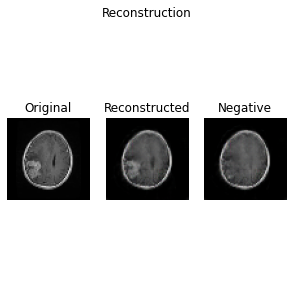

E: 15
tensor([[2.9969e-04, 9.9970e-01]], grad_fn=<SoftmaxBackward0>)
tensor([[6.0160e-04, 9.9940e-01]], grad_fn=<SoftmaxBackward0>)


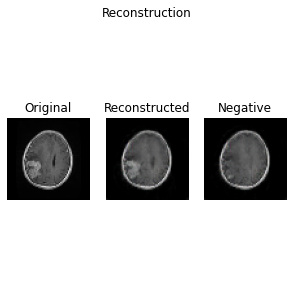

E: 16
tensor([[0.0014, 0.9986]], grad_fn=<SoftmaxBackward0>)
tensor([[0.0018, 0.9982]], grad_fn=<SoftmaxBackward0>)


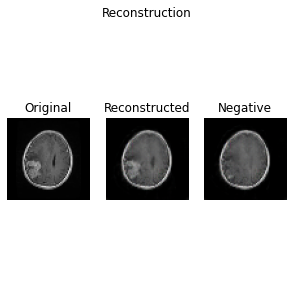

E: 17
tensor([[0.0014, 0.9986]], grad_fn=<SoftmaxBackward0>)
tensor([[0.0020, 0.9980]], grad_fn=<SoftmaxBackward0>)


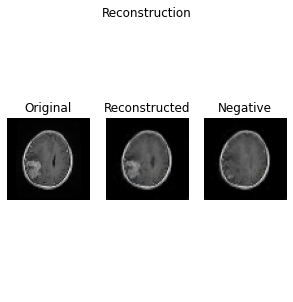

E: 18
tensor([[0.0036, 0.9964]], grad_fn=<SoftmaxBackward0>)
tensor([[0.0048, 0.9952]], grad_fn=<SoftmaxBackward0>)


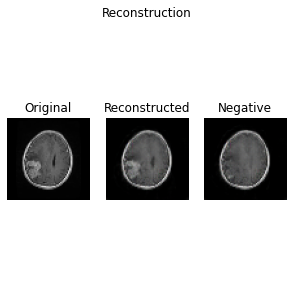

E: 19
tensor([[0.0066, 0.9934]], grad_fn=<SoftmaxBackward0>)
tensor([[0.0071, 0.9929]], grad_fn=<SoftmaxBackward0>)


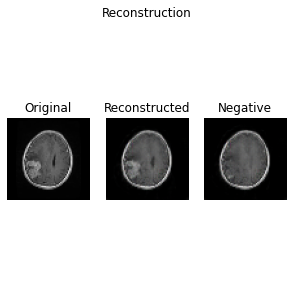

E: 20
tensor([[0.0056, 0.9944]], grad_fn=<SoftmaxBackward0>)
tensor([[0.0079, 0.9921]], grad_fn=<SoftmaxBackward0>)


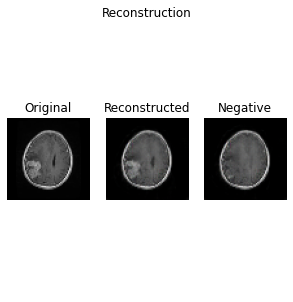

E: 21
tensor([[0.0106, 0.9894]], grad_fn=<SoftmaxBackward0>)
tensor([[0.0134, 0.9866]], grad_fn=<SoftmaxBackward0>)


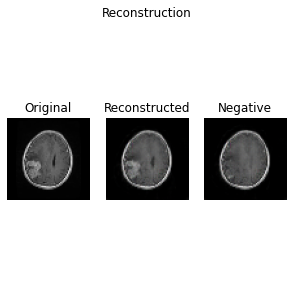

E: 22
tensor([[0.0099, 0.9901]], grad_fn=<SoftmaxBackward0>)
tensor([[0.0197, 0.9803]], grad_fn=<SoftmaxBackward0>)


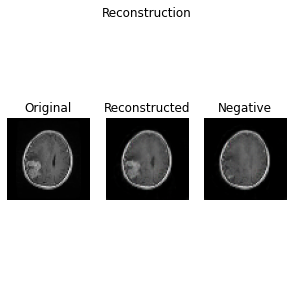

E: 23
tensor([[0.0147, 0.9853]], grad_fn=<SoftmaxBackward0>)
tensor([[0.0199, 0.9801]], grad_fn=<SoftmaxBackward0>)


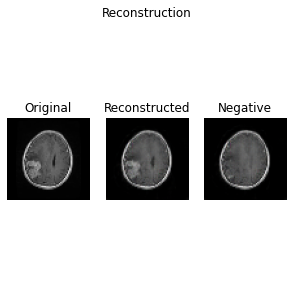

E: 24
tensor([[0.0103, 0.9897]], grad_fn=<SoftmaxBackward0>)
tensor([[0.0248, 0.9752]], grad_fn=<SoftmaxBackward0>)


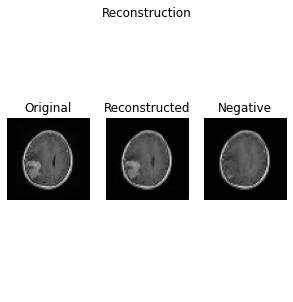

E: 25
tensor([[0.0294, 0.9706]], grad_fn=<SoftmaxBackward0>)
tensor([[0.0620, 0.9380]], grad_fn=<SoftmaxBackward0>)


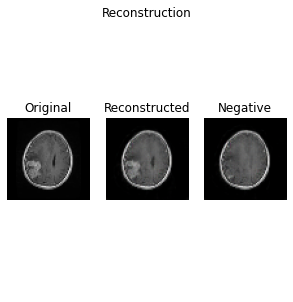

E: 26
tensor([[0.0157, 0.9843]], grad_fn=<SoftmaxBackward0>)
tensor([[0.0399, 0.9601]], grad_fn=<SoftmaxBackward0>)


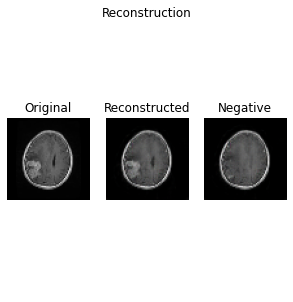

E: 27
tensor([[0.0124, 0.9876]], grad_fn=<SoftmaxBackward0>)
tensor([[0.0138, 0.9862]], grad_fn=<SoftmaxBackward0>)


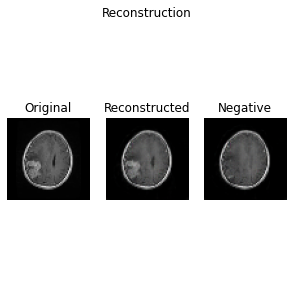

E: 28
tensor([[0.0681, 0.9319]], grad_fn=<SoftmaxBackward0>)
tensor([[0.2300, 0.7700]], grad_fn=<SoftmaxBackward0>)


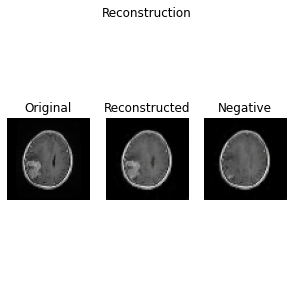

E: 29
tensor([[0.0406, 0.9594]], grad_fn=<SoftmaxBackward0>)
tensor([[0.0449, 0.9551]], grad_fn=<SoftmaxBackward0>)


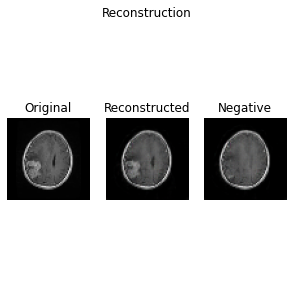

E: 30
tensor([[0.0192, 0.9808]], grad_fn=<SoftmaxBackward0>)
tensor([[0.0249, 0.9751]], grad_fn=<SoftmaxBackward0>)


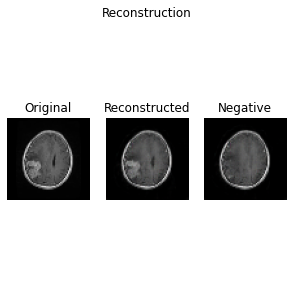

E: 31
tensor([[0.0429, 0.9571]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1840, 0.8160]], grad_fn=<SoftmaxBackward0>)


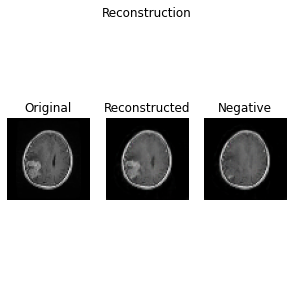

E: 32
tensor([[0.0599, 0.9401]], grad_fn=<SoftmaxBackward0>)
tensor([[0.0684, 0.9316]], grad_fn=<SoftmaxBackward0>)


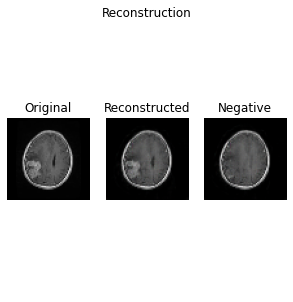

E: 33
tensor([[0.0355, 0.9645]], grad_fn=<SoftmaxBackward0>)
tensor([[0.0854, 0.9146]], grad_fn=<SoftmaxBackward0>)


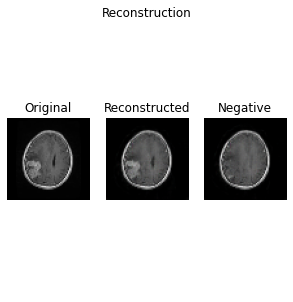

E: 34
tensor([[0.0480, 0.9520]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1042, 0.8958]], grad_fn=<SoftmaxBackward0>)


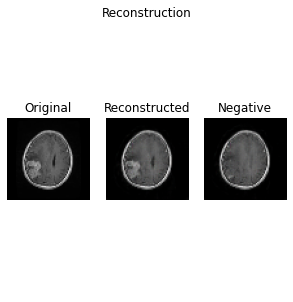

E: 35
tensor([[0.0440, 0.9560]], grad_fn=<SoftmaxBackward0>)
tensor([[0.0891, 0.9109]], grad_fn=<SoftmaxBackward0>)


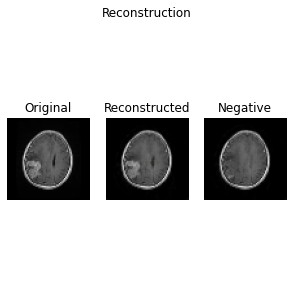

E: 36
tensor([[0.0423, 0.9577]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1084, 0.8916]], grad_fn=<SoftmaxBackward0>)


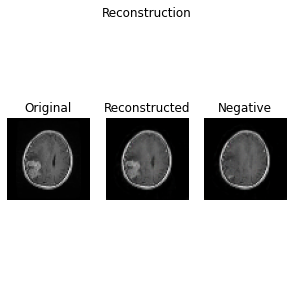

E: 37
tensor([[0.0578, 0.9422]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1021, 0.8979]], grad_fn=<SoftmaxBackward0>)


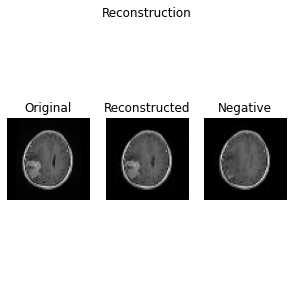

E: 38
tensor([[0.0494, 0.9506]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1034, 0.8966]], grad_fn=<SoftmaxBackward0>)


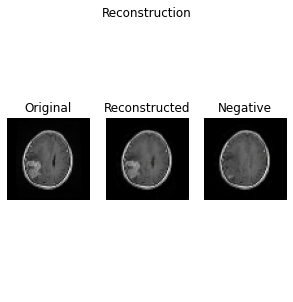

E: 39
tensor([[0.0631, 0.9369]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1132, 0.8868]], grad_fn=<SoftmaxBackward0>)


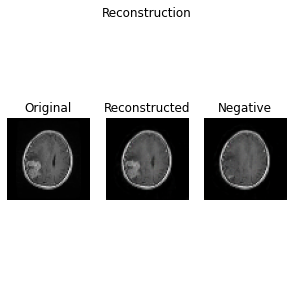

E: 40
tensor([[0.0615, 0.9385]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1069, 0.8931]], grad_fn=<SoftmaxBackward0>)


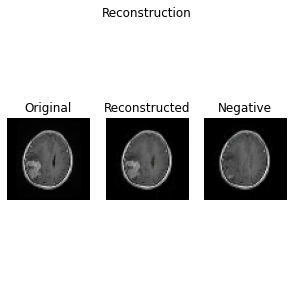

E: 41
tensor([[0.0706, 0.9294]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1111, 0.8889]], grad_fn=<SoftmaxBackward0>)


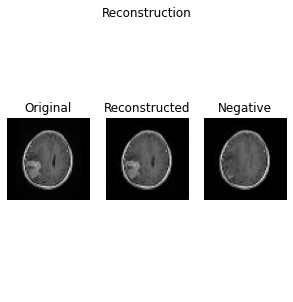

E: 42
tensor([[0.0609, 0.9391]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1133, 0.8867]], grad_fn=<SoftmaxBackward0>)


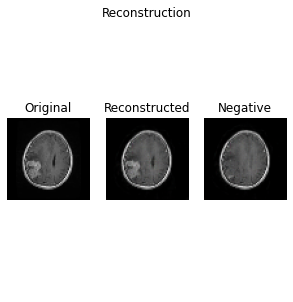

E: 43
tensor([[0.0874, 0.9126]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1132, 0.8868]], grad_fn=<SoftmaxBackward0>)


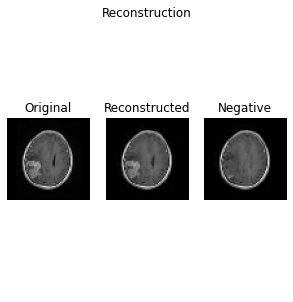

E: 44
tensor([[0.0678, 0.9322]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1202, 0.8798]], grad_fn=<SoftmaxBackward0>)


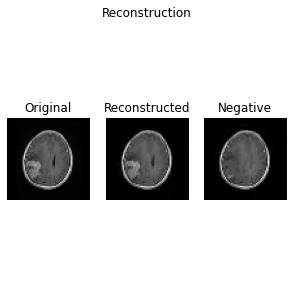

E: 45
tensor([[0.0738, 0.9262]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1156, 0.8844]], grad_fn=<SoftmaxBackward0>)


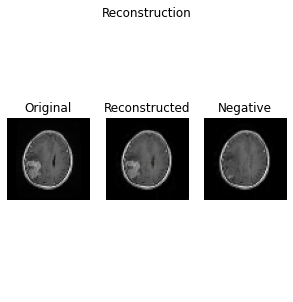

E: 46
tensor([[0.0841, 0.9159]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1127, 0.8873]], grad_fn=<SoftmaxBackward0>)


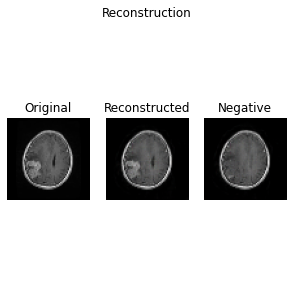

E: 47
tensor([[0.0754, 0.9246]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1231, 0.8769]], grad_fn=<SoftmaxBackward0>)


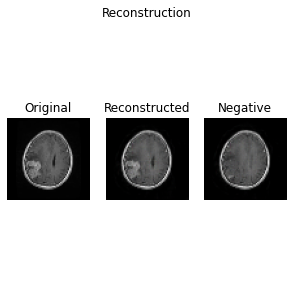

E: 48
tensor([[0.0631, 0.9369]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1293, 0.8707]], grad_fn=<SoftmaxBackward0>)


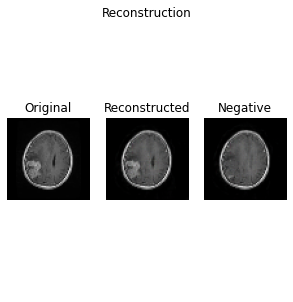

E: 49
tensor([[0.1229, 0.8771]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1025, 0.8975]], grad_fn=<SoftmaxBackward0>)


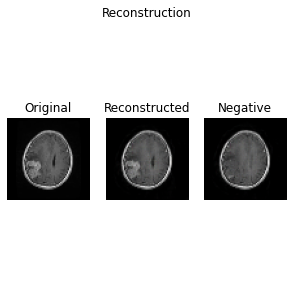

E: 50
tensor([[0.0562, 0.9438]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1239, 0.8761]], grad_fn=<SoftmaxBackward0>)


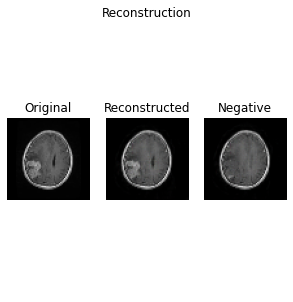

E: 51
tensor([[0.1627, 0.8373]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1631, 0.8369]], grad_fn=<SoftmaxBackward0>)


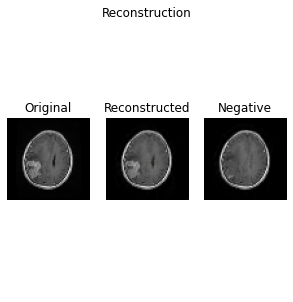

E: 52
tensor([[0.0708, 0.9292]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1019, 0.8981]], grad_fn=<SoftmaxBackward0>)


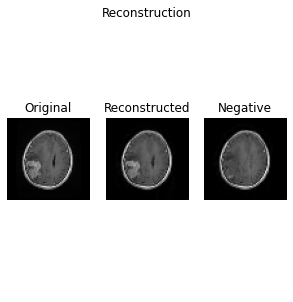

E: 53
tensor([[0.0710, 0.9290]], grad_fn=<SoftmaxBackward0>)
tensor([[0.0913, 0.9087]], grad_fn=<SoftmaxBackward0>)


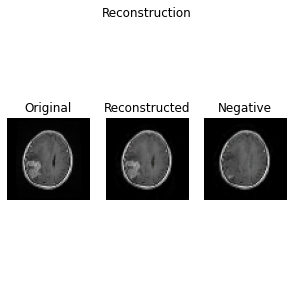

E: 54
tensor([[0.1533, 0.8467]], grad_fn=<SoftmaxBackward0>)
tensor([[0.2646, 0.7354]], grad_fn=<SoftmaxBackward0>)


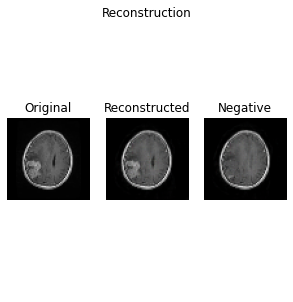

E: 55
tensor([[0.1529, 0.8471]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1054, 0.8946]], grad_fn=<SoftmaxBackward0>)


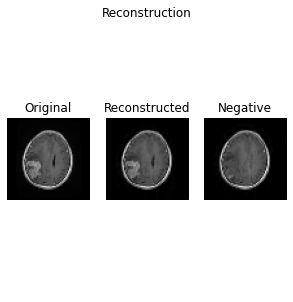

E: 56
tensor([[0.0409, 0.9591]], grad_fn=<SoftmaxBackward0>)
tensor([[0.0563, 0.9437]], grad_fn=<SoftmaxBackward0>)


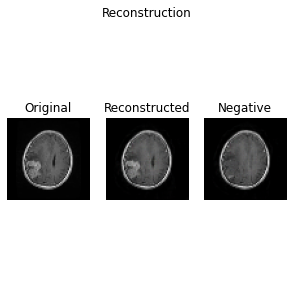

E: 57
tensor([[0.2519, 0.7481]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3439, 0.6561]], grad_fn=<SoftmaxBackward0>)


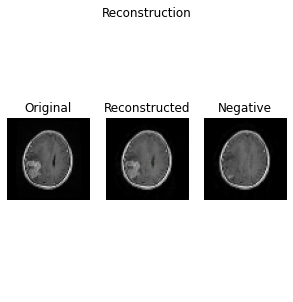

E: 58
tensor([[0.0841, 0.9159]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1161, 0.8839]], grad_fn=<SoftmaxBackward0>)


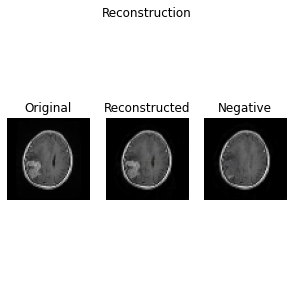

E: 59
tensor([[0.0603, 0.9397]], grad_fn=<SoftmaxBackward0>)
tensor([[0.0533, 0.9467]], grad_fn=<SoftmaxBackward0>)


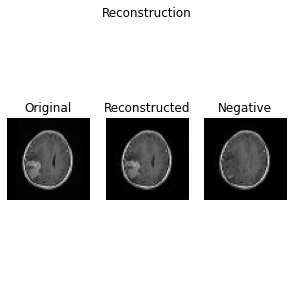

E: 60
tensor([[0.1255, 0.8745]], grad_fn=<SoftmaxBackward0>)
tensor([[0.2696, 0.7304]], grad_fn=<SoftmaxBackward0>)


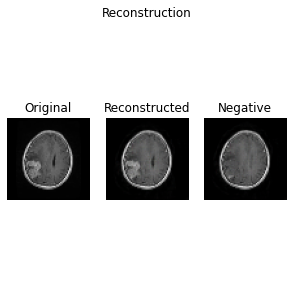

E: 61
tensor([[0.1978, 0.8022]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1580, 0.8420]], grad_fn=<SoftmaxBackward0>)


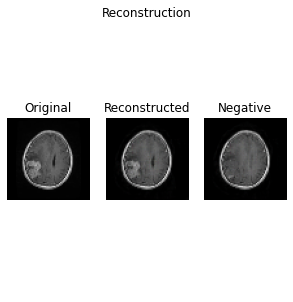

E: 62
tensor([[0.0480, 0.9520]], grad_fn=<SoftmaxBackward0>)
tensor([[0.0604, 0.9396]], grad_fn=<SoftmaxBackward0>)


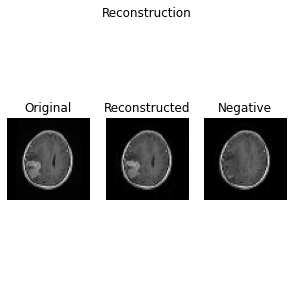

E: 63
tensor([[0.1585, 0.8415]], grad_fn=<SoftmaxBackward0>)
tensor([[0.2684, 0.7316]], grad_fn=<SoftmaxBackward0>)


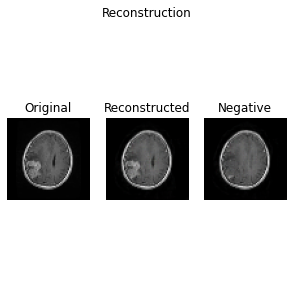

E: 64
tensor([[0.1779, 0.8221]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1467, 0.8533]], grad_fn=<SoftmaxBackward0>)


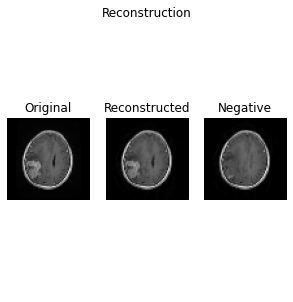

E: 65
tensor([[0.0871, 0.9129]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1069, 0.8931]], grad_fn=<SoftmaxBackward0>)


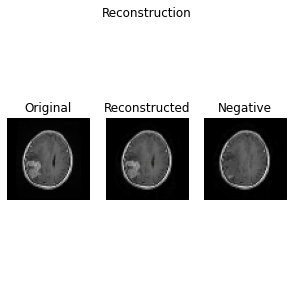

E: 66
tensor([[0.1403, 0.8597]], grad_fn=<SoftmaxBackward0>)
tensor([[0.2195, 0.7805]], grad_fn=<SoftmaxBackward0>)


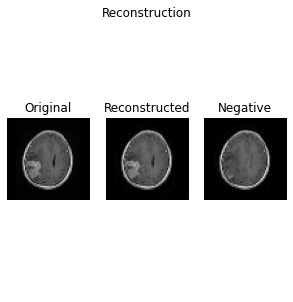

E: 67
tensor([[0.1664, 0.8336]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1747, 0.8253]], grad_fn=<SoftmaxBackward0>)


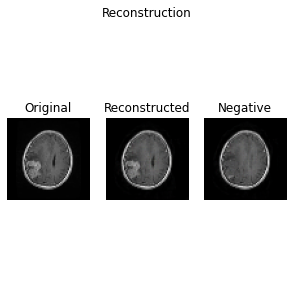

E: 68
tensor([[0.1113, 0.8887]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1412, 0.8588]], grad_fn=<SoftmaxBackward0>)


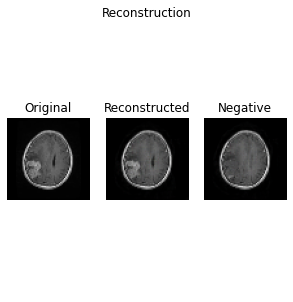

E: 69
tensor([[0.1510, 0.8490]], grad_fn=<SoftmaxBackward0>)
tensor([[0.2102, 0.7898]], grad_fn=<SoftmaxBackward0>)


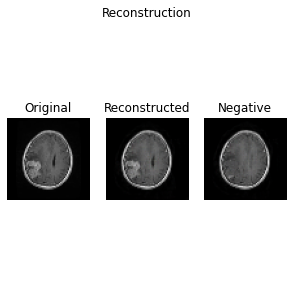

E: 70
tensor([[0.1732, 0.8268]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1945, 0.8055]], grad_fn=<SoftmaxBackward0>)


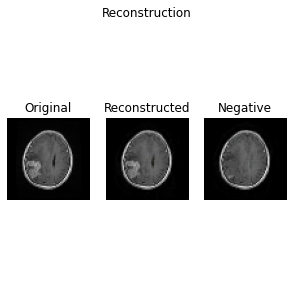

E: 71
tensor([[0.1314, 0.8686]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1637, 0.8363]], grad_fn=<SoftmaxBackward0>)


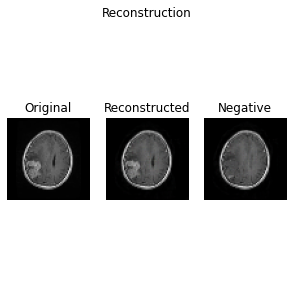

E: 72
tensor([[0.1495, 0.8505]], grad_fn=<SoftmaxBackward0>)
tensor([[0.2037, 0.7963]], grad_fn=<SoftmaxBackward0>)


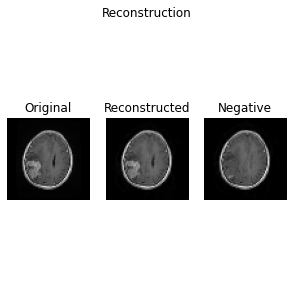

E: 73
tensor([[0.1837, 0.8163]], grad_fn=<SoftmaxBackward0>)
tensor([[0.2154, 0.7846]], grad_fn=<SoftmaxBackward0>)


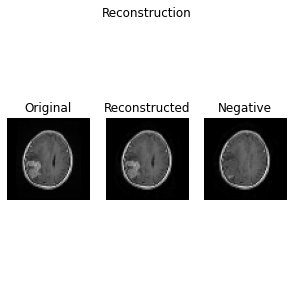

E: 74
tensor([[0.1401, 0.8599]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1799, 0.8201]], grad_fn=<SoftmaxBackward0>)


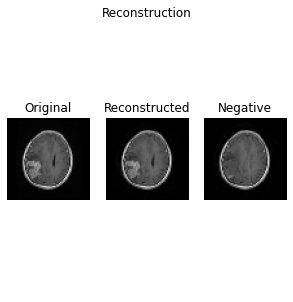

E: 75
tensor([[0.1525, 0.8475]], grad_fn=<SoftmaxBackward0>)
tensor([[0.2073, 0.7927]], grad_fn=<SoftmaxBackward0>)


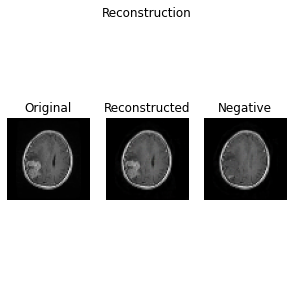

E: 76
tensor([[0.1969, 0.8031]], grad_fn=<SoftmaxBackward0>)
tensor([[0.2429, 0.7571]], grad_fn=<SoftmaxBackward0>)


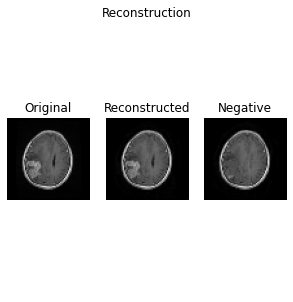

E: 77
tensor([[0.1587, 0.8413]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1980, 0.8020]], grad_fn=<SoftmaxBackward0>)


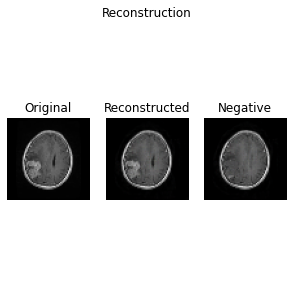

E: 78
tensor([[0.1421, 0.8579]], grad_fn=<SoftmaxBackward0>)
tensor([[0.2060, 0.7940]], grad_fn=<SoftmaxBackward0>)


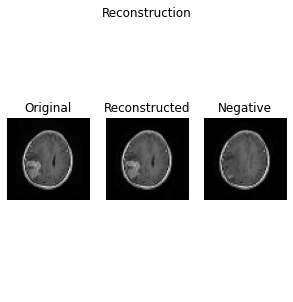

E: 79
tensor([[0.2151, 0.7849]], grad_fn=<SoftmaxBackward0>)
tensor([[0.2759, 0.7241]], grad_fn=<SoftmaxBackward0>)


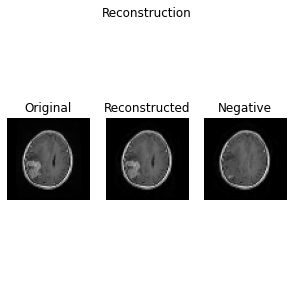

E: 80
tensor([[0.1723, 0.8277]], grad_fn=<SoftmaxBackward0>)
tensor([[0.2185, 0.7815]], grad_fn=<SoftmaxBackward0>)


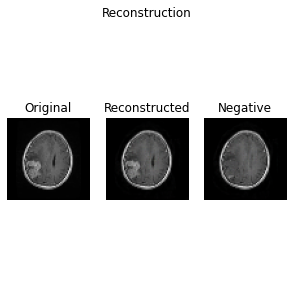

E: 81
tensor([[0.1364, 0.8636]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1983, 0.8017]], grad_fn=<SoftmaxBackward0>)


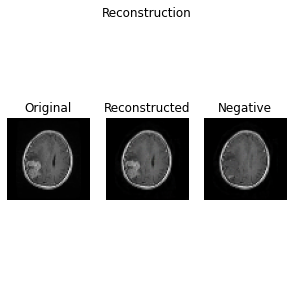

E: 82
tensor([[0.2299, 0.7701]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3027, 0.6973]], grad_fn=<SoftmaxBackward0>)


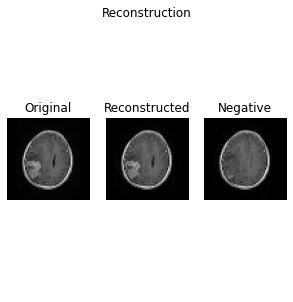

E: 83
tensor([[0.2001, 0.7999]], grad_fn=<SoftmaxBackward0>)
tensor([[0.2510, 0.7490]], grad_fn=<SoftmaxBackward0>)


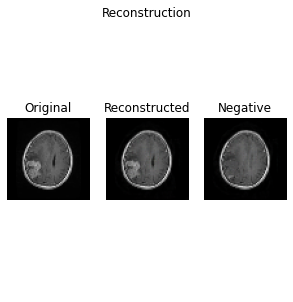

E: 84
tensor([[0.1244, 0.8756]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1768, 0.8232]], grad_fn=<SoftmaxBackward0>)


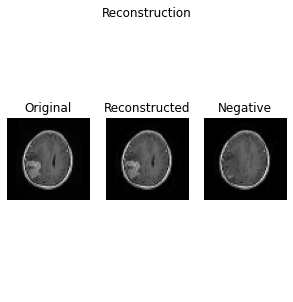

E: 85
tensor([[0.2240, 0.7760]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3032, 0.6968]], grad_fn=<SoftmaxBackward0>)


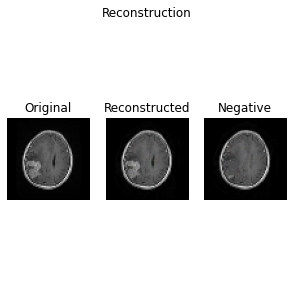

E: 86
tensor([[0.2279, 0.7721]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3068, 0.6932]], grad_fn=<SoftmaxBackward0>)


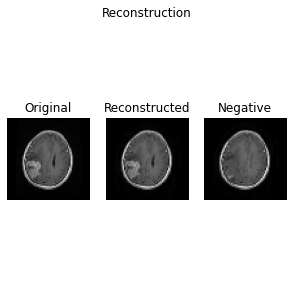

E: 87
tensor([[0.1236, 0.8764]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1619, 0.8381]], grad_fn=<SoftmaxBackward0>)


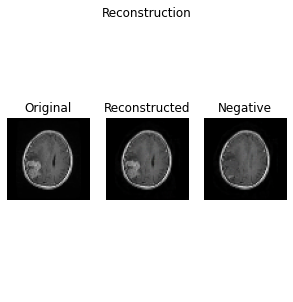

E: 88
tensor([[0.1595, 0.8405]], grad_fn=<SoftmaxBackward0>)
tensor([[0.2442, 0.7558]], grad_fn=<SoftmaxBackward0>)


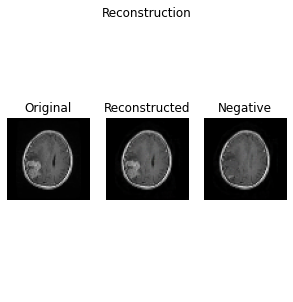

E: 89
tensor([[0.2845, 0.7155]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3941, 0.6059]], grad_fn=<SoftmaxBackward0>)


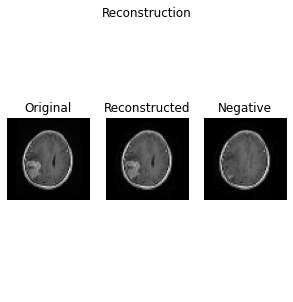

E: 90
tensor([[0.1534, 0.8466]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1815, 0.8185]], grad_fn=<SoftmaxBackward0>)


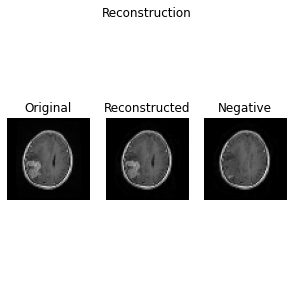

E: 91
tensor([[0.0930, 0.9070]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1594, 0.8406]], grad_fn=<SoftmaxBackward0>)


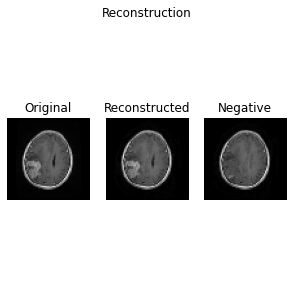

E: 92
tensor([[0.3394, 0.6606]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4611, 0.5389]], grad_fn=<SoftmaxBackward0>)


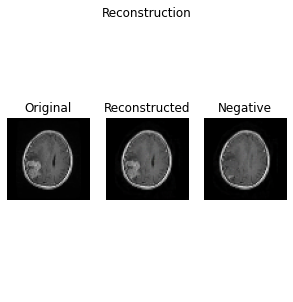

E: 93
tensor([[0.1913, 0.8087]], grad_fn=<SoftmaxBackward0>)
tensor([[0.2489, 0.7511]], grad_fn=<SoftmaxBackward0>)


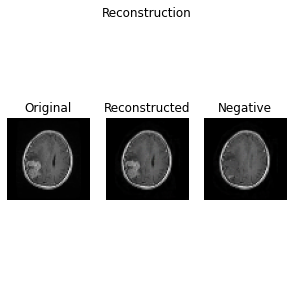

E: 94
tensor([[0.1012, 0.8988]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1180, 0.8820]], grad_fn=<SoftmaxBackward0>)


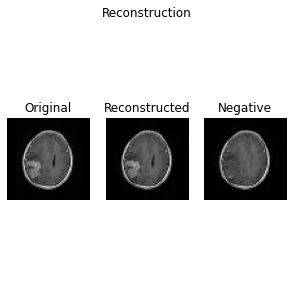

E: 95
tensor([[0.2456, 0.7544]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4214, 0.5786]], grad_fn=<SoftmaxBackward0>)


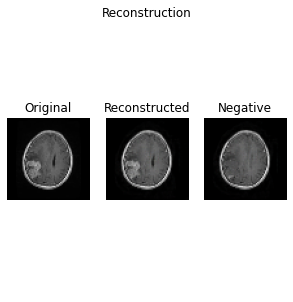

E: 96
tensor([[0.2629, 0.7371]], grad_fn=<SoftmaxBackward0>)
tensor([[0.2698, 0.7302]], grad_fn=<SoftmaxBackward0>)


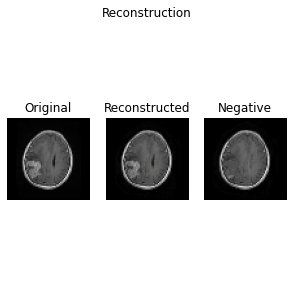

E: 97
tensor([[0.1189, 0.8811]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1204, 0.8796]], grad_fn=<SoftmaxBackward0>)


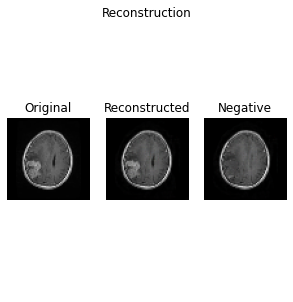

E: 98
tensor([[0.1299, 0.8701]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4150, 0.5850]], grad_fn=<SoftmaxBackward0>)


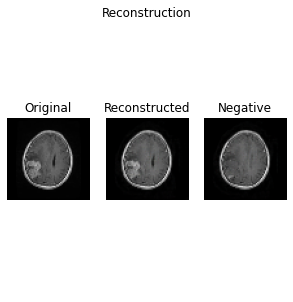

E: 99
tensor([[0.3973, 0.6027]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3058, 0.6942]], grad_fn=<SoftmaxBackward0>)


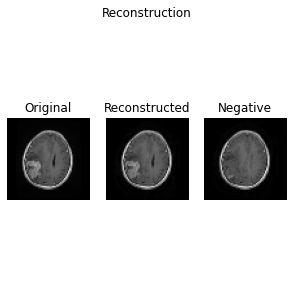

E: 100
tensor([[0.1267, 0.8733]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1572, 0.8428]], grad_fn=<SoftmaxBackward0>)


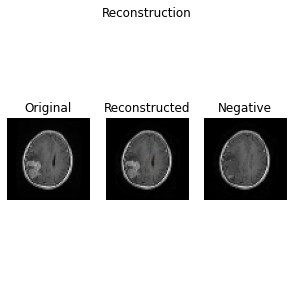

E: 101
tensor([[0.1636, 0.8364]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3551, 0.6449]], grad_fn=<SoftmaxBackward0>)


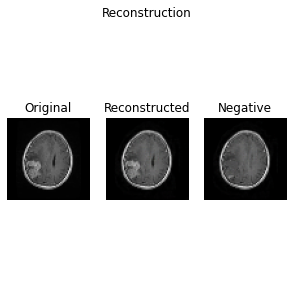

E: 102
tensor([[0.2643, 0.7357]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3031, 0.6969]], grad_fn=<SoftmaxBackward0>)


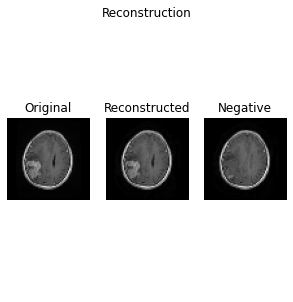

E: 103
tensor([[0.1464, 0.8536]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1862, 0.8138]], grad_fn=<SoftmaxBackward0>)


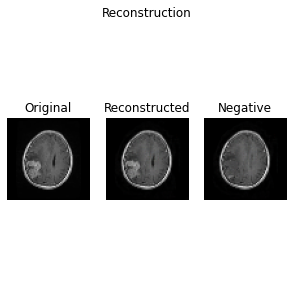

E: 104
tensor([[0.2044, 0.7956]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3658, 0.6342]], grad_fn=<SoftmaxBackward0>)


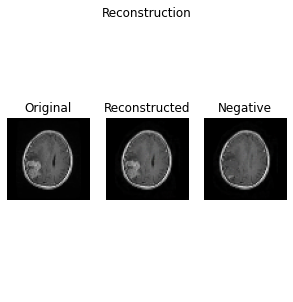

E: 105
tensor([[0.2289, 0.7711]], grad_fn=<SoftmaxBackward0>)
tensor([[0.2922, 0.7078]], grad_fn=<SoftmaxBackward0>)


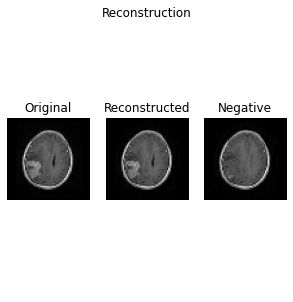

E: 106
tensor([[0.1922, 0.8078]], grad_fn=<SoftmaxBackward0>)
tensor([[0.2473, 0.7527]], grad_fn=<SoftmaxBackward0>)


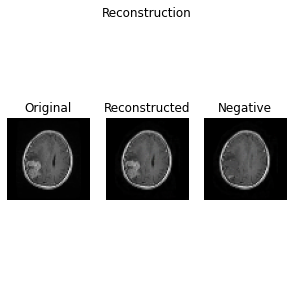

E: 107
tensor([[0.2088, 0.7912]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3352, 0.6648]], grad_fn=<SoftmaxBackward0>)


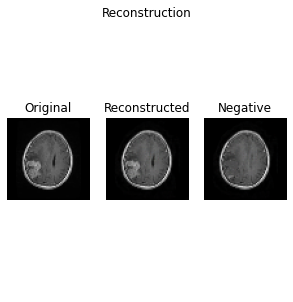

E: 108
tensor([[0.2398, 0.7602]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3101, 0.6899]], grad_fn=<SoftmaxBackward0>)


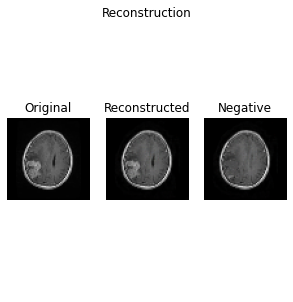

E: 109
tensor([[0.2012, 0.7988]], grad_fn=<SoftmaxBackward0>)
tensor([[0.2752, 0.7248]], grad_fn=<SoftmaxBackward0>)


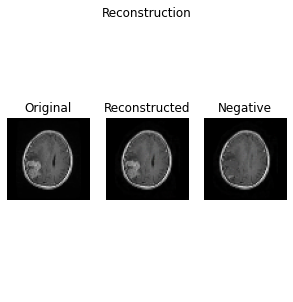

E: 110
tensor([[0.2273, 0.7727]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3384, 0.6616]], grad_fn=<SoftmaxBackward0>)


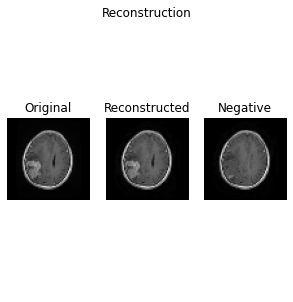

E: 111
tensor([[0.2347, 0.7653]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3155, 0.6845]], grad_fn=<SoftmaxBackward0>)


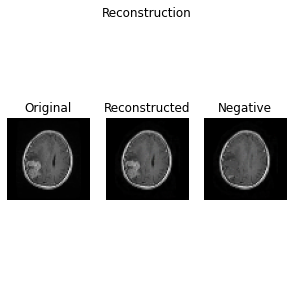

E: 112
tensor([[0.2265, 0.7735]], grad_fn=<SoftmaxBackward0>)
tensor([[0.2994, 0.7006]], grad_fn=<SoftmaxBackward0>)


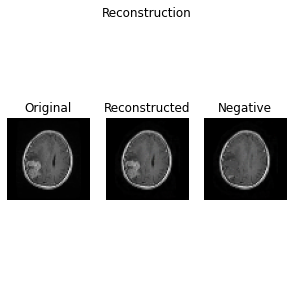

E: 113
tensor([[0.2180, 0.7820]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3297, 0.6703]], grad_fn=<SoftmaxBackward0>)


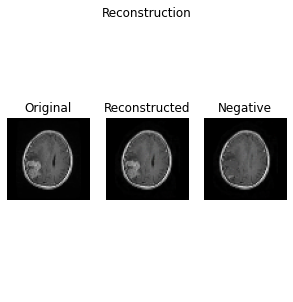

E: 114
tensor([[0.2519, 0.7481]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3341, 0.6659]], grad_fn=<SoftmaxBackward0>)


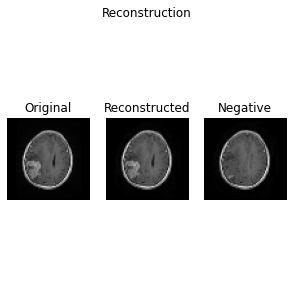

E: 115
tensor([[0.2234, 0.7766]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3124, 0.6876]], grad_fn=<SoftmaxBackward0>)


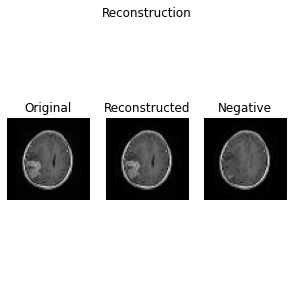

E: 116
tensor([[0.2378, 0.7622]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3362, 0.6638]], grad_fn=<SoftmaxBackward0>)


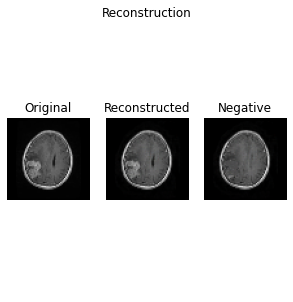

E: 117
tensor([[0.2350, 0.7650]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3379, 0.6621]], grad_fn=<SoftmaxBackward0>)


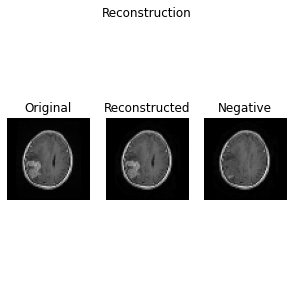

E: 118
tensor([[0.2504, 0.7496]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3309, 0.6691]], grad_fn=<SoftmaxBackward0>)


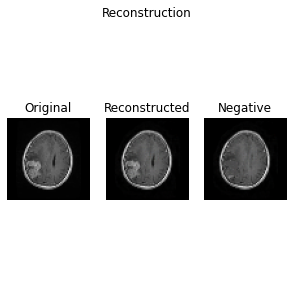

E: 119
tensor([[0.2167, 0.7833]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3339, 0.6661]], grad_fn=<SoftmaxBackward0>)


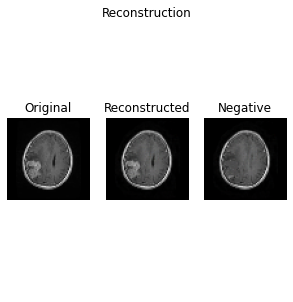

E: 120
tensor([[0.2647, 0.7353]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3557, 0.6443]], grad_fn=<SoftmaxBackward0>)


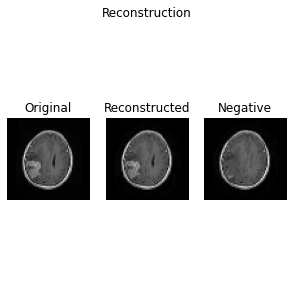

E: 121
tensor([[0.2341, 0.7659]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3361, 0.6639]], grad_fn=<SoftmaxBackward0>)


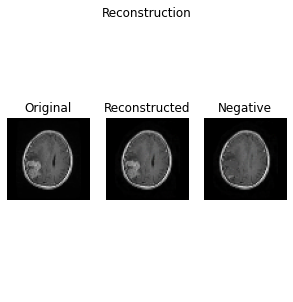

E: 122
tensor([[0.2480, 0.7520]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3431, 0.6569]], grad_fn=<SoftmaxBackward0>)


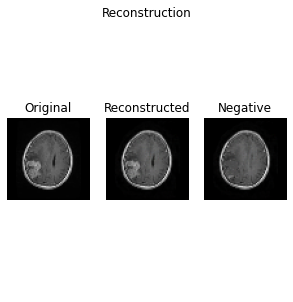

E: 123
tensor([[0.2242, 0.7758]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3534, 0.6466]], grad_fn=<SoftmaxBackward0>)


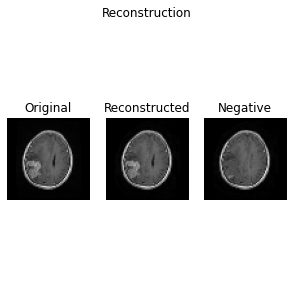

E: 124
tensor([[0.2960, 0.7040]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3652, 0.6348]], grad_fn=<SoftmaxBackward0>)


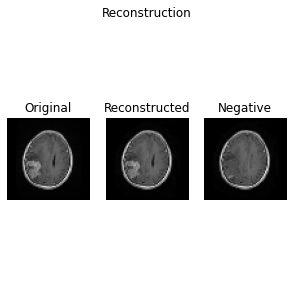

E: 125
tensor([[0.2009, 0.7991]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3374, 0.6626]], grad_fn=<SoftmaxBackward0>)


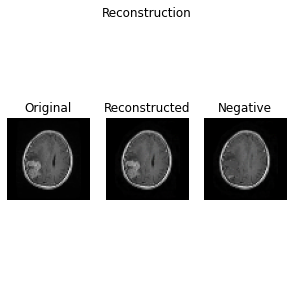

E: 126
tensor([[0.2768, 0.7232]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3641, 0.6359]], grad_fn=<SoftmaxBackward0>)


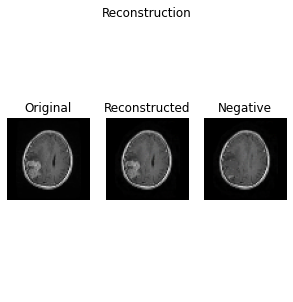

E: 127
tensor([[0.2257, 0.7743]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3651, 0.6349]], grad_fn=<SoftmaxBackward0>)


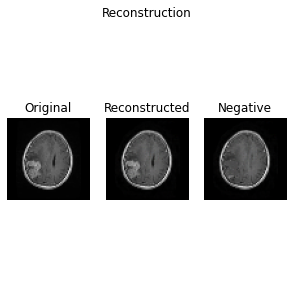

E: 128
tensor([[0.2904, 0.7096]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3498, 0.6502]], grad_fn=<SoftmaxBackward0>)


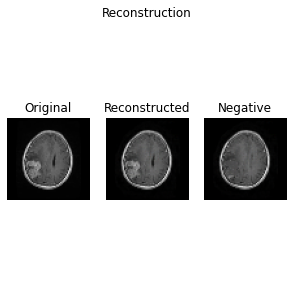

E: 129
tensor([[0.1703, 0.8297]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3383, 0.6617]], grad_fn=<SoftmaxBackward0>)


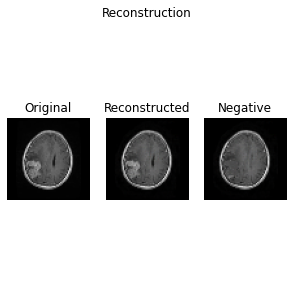

E: 130
tensor([[0.3515, 0.6485]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4094, 0.5906]], grad_fn=<SoftmaxBackward0>)


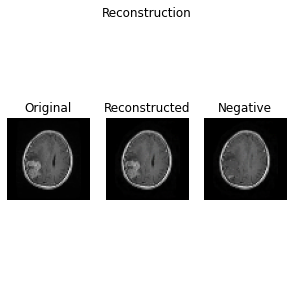

E: 131
tensor([[0.2069, 0.7931]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3642, 0.6358]], grad_fn=<SoftmaxBackward0>)


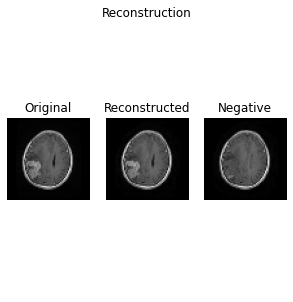

E: 132
tensor([[0.2555, 0.7445]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3273, 0.6727]], grad_fn=<SoftmaxBackward0>)


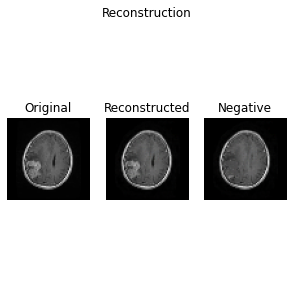

E: 133
tensor([[0.2270, 0.7730]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3881, 0.6119]], grad_fn=<SoftmaxBackward0>)


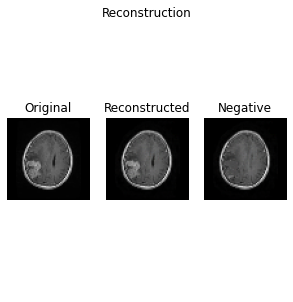

E: 134
tensor([[0.3200, 0.6800]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4076, 0.5924]], grad_fn=<SoftmaxBackward0>)


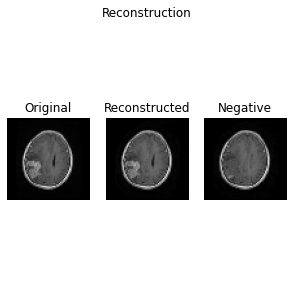

E: 135
tensor([[0.1928, 0.8072]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3199, 0.6801]], grad_fn=<SoftmaxBackward0>)


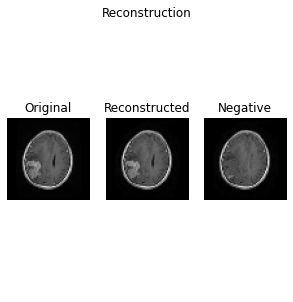

E: 136
tensor([[0.2904, 0.7096]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3627, 0.6373]], grad_fn=<SoftmaxBackward0>)


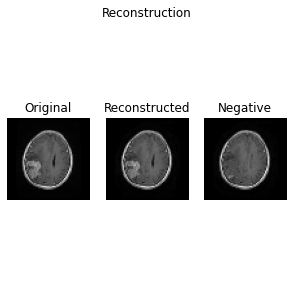

E: 137
tensor([[0.2600, 0.7400]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4009, 0.5991]], grad_fn=<SoftmaxBackward0>)


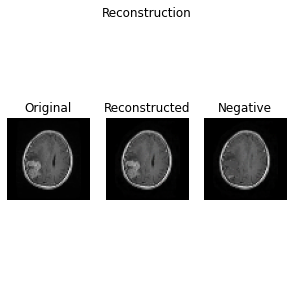

E: 138
tensor([[0.2550, 0.7450]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3673, 0.6327]], grad_fn=<SoftmaxBackward0>)


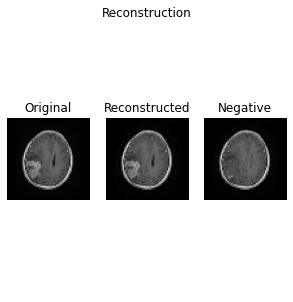

E: 139
tensor([[0.2434, 0.7566]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3885, 0.6115]], grad_fn=<SoftmaxBackward0>)


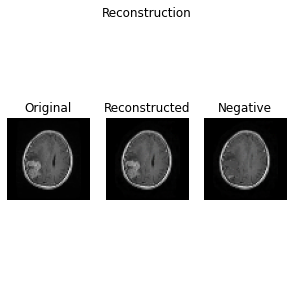

E: 140
tensor([[0.3006, 0.6994]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3682, 0.6318]], grad_fn=<SoftmaxBackward0>)


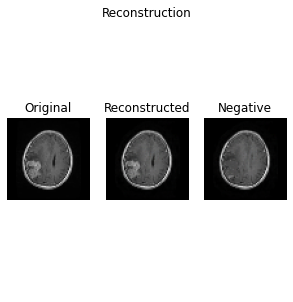

E: 141
tensor([[0.2104, 0.7896]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3542, 0.6458]], grad_fn=<SoftmaxBackward0>)


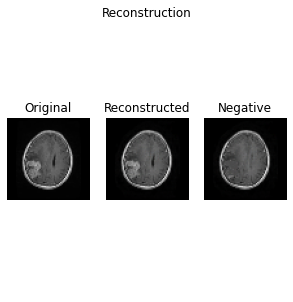

E: 142
tensor([[0.2909, 0.7091]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4542, 0.5458]], grad_fn=<SoftmaxBackward0>)


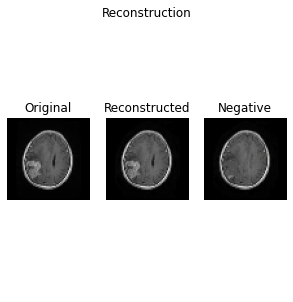

E: 143
tensor([[0.3228, 0.6772]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3474, 0.6526]], grad_fn=<SoftmaxBackward0>)


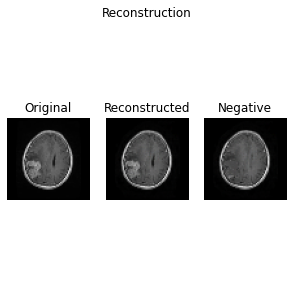

E: 144
tensor([[0.1500, 0.8500]], grad_fn=<SoftmaxBackward0>)
tensor([[0.2509, 0.7491]], grad_fn=<SoftmaxBackward0>)


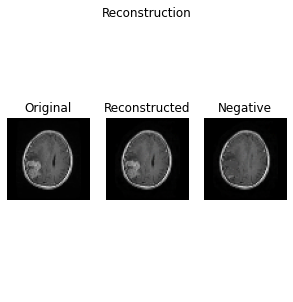

E: 145
tensor([[0.3289, 0.6711]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4958, 0.5042]], grad_fn=<SoftmaxBackward0>)


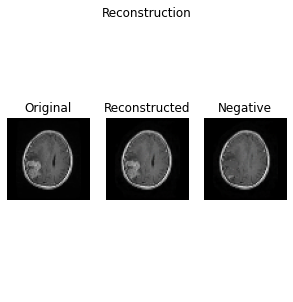

E: 146
tensor([[0.3731, 0.6269]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4383, 0.5617]], grad_fn=<SoftmaxBackward0>)


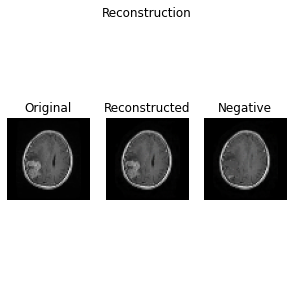

E: 147
tensor([[0.1808, 0.8192]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1961, 0.8039]], grad_fn=<SoftmaxBackward0>)


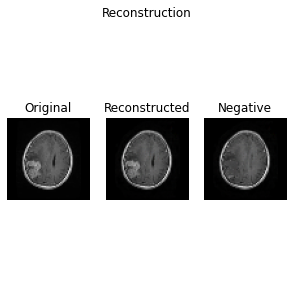

E: 148
tensor([[0.1414, 0.8586]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3909, 0.6091]], grad_fn=<SoftmaxBackward0>)


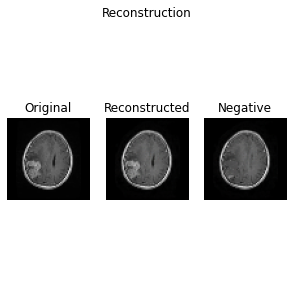

E: 149
tensor([[0.5268, 0.4732]], grad_fn=<SoftmaxBackward0>)
tensor([[0.5334, 0.4666]], grad_fn=<SoftmaxBackward0>)


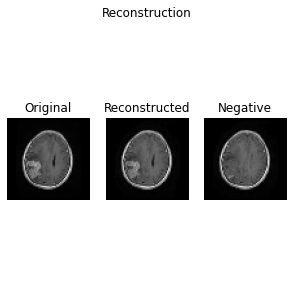

E: 150
tensor([[0.2022, 0.7978]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1920, 0.8080]], grad_fn=<SoftmaxBackward0>)


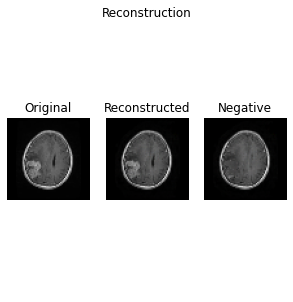

E: 151
tensor([[0.1294, 0.8706]], grad_fn=<SoftmaxBackward0>)
tensor([[0.2982, 0.7018]], grad_fn=<SoftmaxBackward0>)


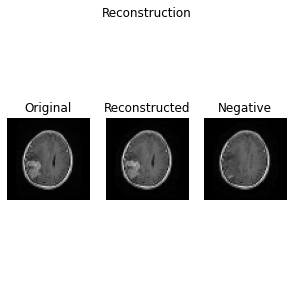

E: 152
tensor([[0.5066, 0.4934]], grad_fn=<SoftmaxBackward0>)
tensor([[0.5409, 0.4591]], grad_fn=<SoftmaxBackward0>)


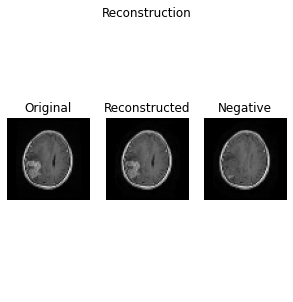

E: 153
tensor([[0.1894, 0.8106]], grad_fn=<SoftmaxBackward0>)
tensor([[0.2649, 0.7351]], grad_fn=<SoftmaxBackward0>)


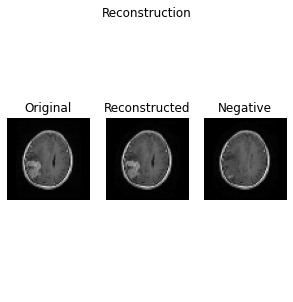

E: 154
tensor([[0.2683, 0.7317]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3930, 0.6070]], grad_fn=<SoftmaxBackward0>)


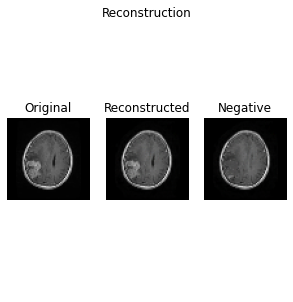

E: 155
tensor([[0.3009, 0.6991]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4582, 0.5418]], grad_fn=<SoftmaxBackward0>)


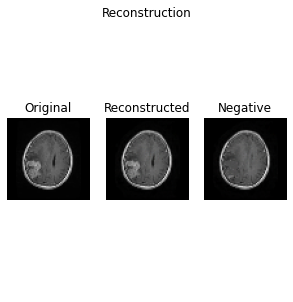

E: 156
tensor([[0.2977, 0.7023]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3625, 0.6375]], grad_fn=<SoftmaxBackward0>)


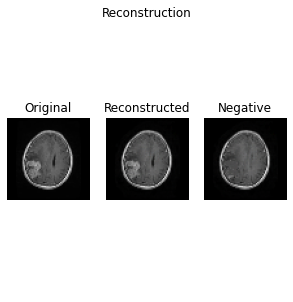

E: 157
tensor([[0.2352, 0.7648]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3930, 0.6070]], grad_fn=<SoftmaxBackward0>)


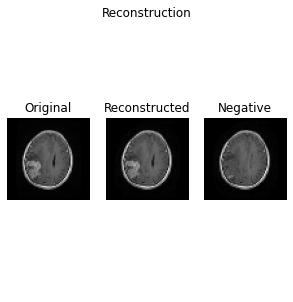

E: 158
tensor([[0.3205, 0.6795]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4401, 0.5599]], grad_fn=<SoftmaxBackward0>)


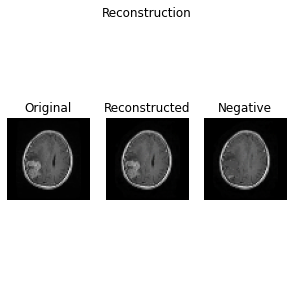

E: 159
tensor([[0.2727, 0.7273]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3967, 0.6033]], grad_fn=<SoftmaxBackward0>)


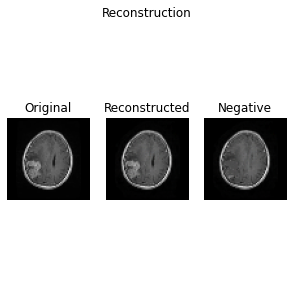

E: 160
tensor([[0.2875, 0.7125]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4048, 0.5952]], grad_fn=<SoftmaxBackward0>)


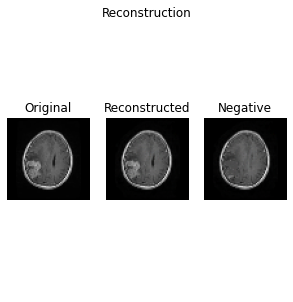

E: 161
tensor([[0.2856, 0.7144]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4271, 0.5729]], grad_fn=<SoftmaxBackward0>)


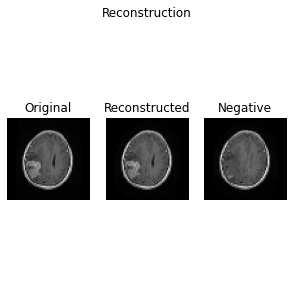

E: 162
tensor([[0.3025, 0.6975]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4152, 0.5848]], grad_fn=<SoftmaxBackward0>)


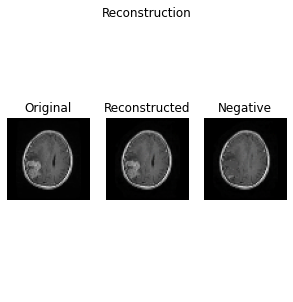

E: 163
tensor([[0.2771, 0.7229]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4081, 0.5919]], grad_fn=<SoftmaxBackward0>)


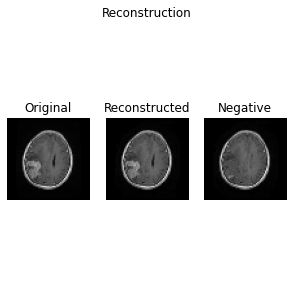

E: 164
tensor([[0.2993, 0.7007]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4279, 0.5721]], grad_fn=<SoftmaxBackward0>)


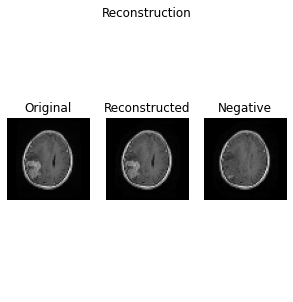

E: 165
tensor([[0.2938, 0.7062]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4214, 0.5786]], grad_fn=<SoftmaxBackward0>)


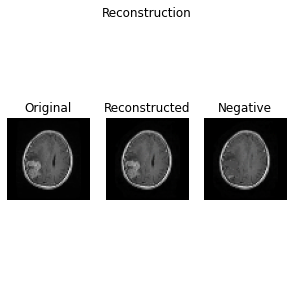

E: 166
tensor([[0.2944, 0.7056]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4170, 0.5830]], grad_fn=<SoftmaxBackward0>)


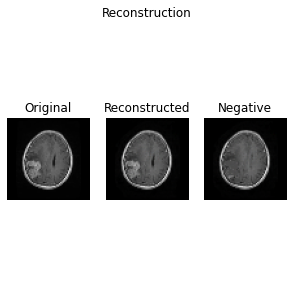

E: 167
tensor([[0.2875, 0.7125]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4228, 0.5772]], grad_fn=<SoftmaxBackward0>)


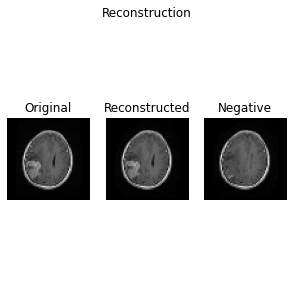

E: 168
tensor([[0.3005, 0.6995]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4290, 0.5710]], grad_fn=<SoftmaxBackward0>)


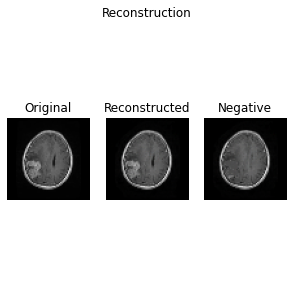

E: 169
tensor([[0.2892, 0.7108]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4196, 0.5804]], grad_fn=<SoftmaxBackward0>)


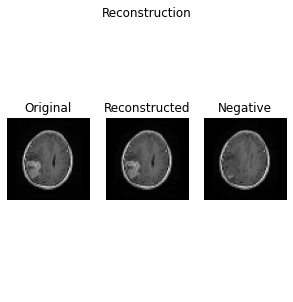

E: 170
tensor([[0.2934, 0.7066]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4275, 0.5725]], grad_fn=<SoftmaxBackward0>)


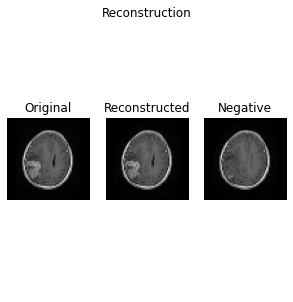

E: 171
tensor([[0.2928, 0.7072]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4315, 0.5685]], grad_fn=<SoftmaxBackward0>)


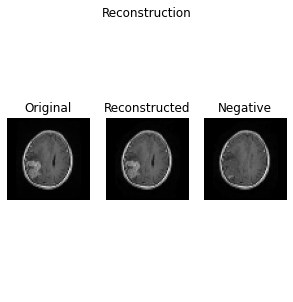

E: 172
tensor([[0.2972, 0.7028]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4329, 0.5671]], grad_fn=<SoftmaxBackward0>)


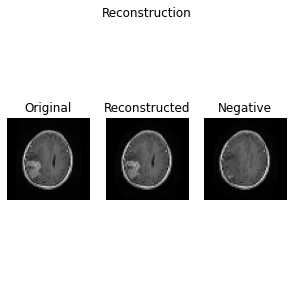

E: 173
tensor([[0.2883, 0.7117]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4290, 0.5710]], grad_fn=<SoftmaxBackward0>)


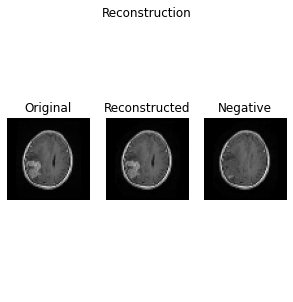

E: 174
tensor([[0.2957, 0.7043]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4394, 0.5606]], grad_fn=<SoftmaxBackward0>)


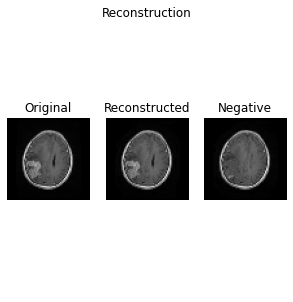

E: 175
tensor([[0.2957, 0.7043]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4382, 0.5618]], grad_fn=<SoftmaxBackward0>)


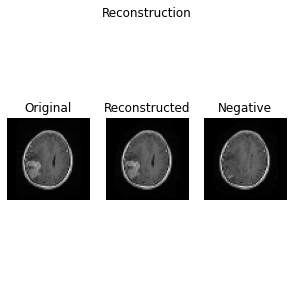

E: 176
tensor([[0.2947, 0.7053]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4369, 0.5631]], grad_fn=<SoftmaxBackward0>)


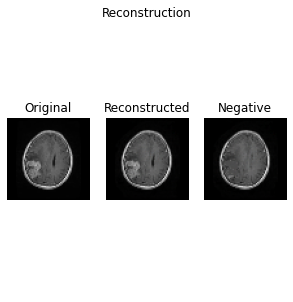

E: 177
tensor([[0.2895, 0.7105]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4380, 0.5620]], grad_fn=<SoftmaxBackward0>)


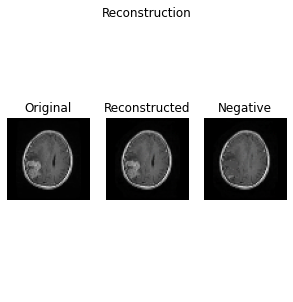

E: 178
tensor([[0.2998, 0.7002]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4449, 0.5551]], grad_fn=<SoftmaxBackward0>)


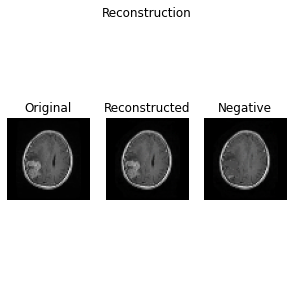

E: 179
tensor([[0.2957, 0.7043]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4405, 0.5595]], grad_fn=<SoftmaxBackward0>)


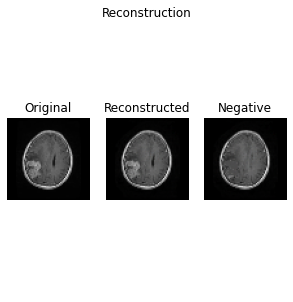

E: 180
tensor([[0.2922, 0.7078]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4398, 0.5602]], grad_fn=<SoftmaxBackward0>)


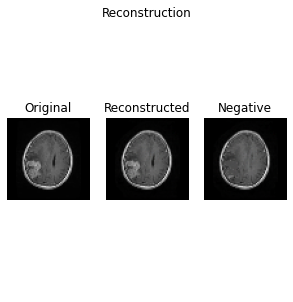

E: 181
tensor([[0.2949, 0.7051]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4450, 0.5550]], grad_fn=<SoftmaxBackward0>)


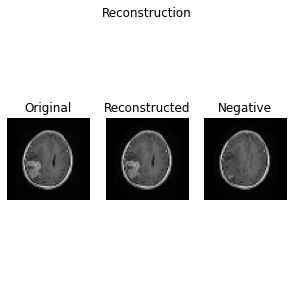

E: 182
tensor([[0.3051, 0.6949]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4509, 0.5491]], grad_fn=<SoftmaxBackward0>)


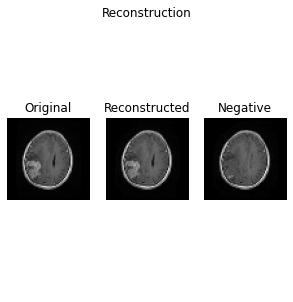

E: 183
tensor([[0.2898, 0.7102]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4401, 0.5599]], grad_fn=<SoftmaxBackward0>)


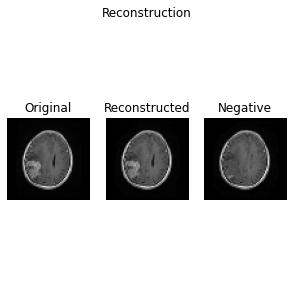

E: 184
tensor([[0.2928, 0.7072]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4448, 0.5552]], grad_fn=<SoftmaxBackward0>)


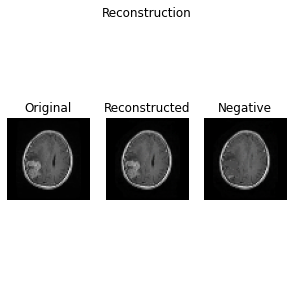

E: 185
tensor([[0.3053, 0.6947]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4558, 0.5442]], grad_fn=<SoftmaxBackward0>)


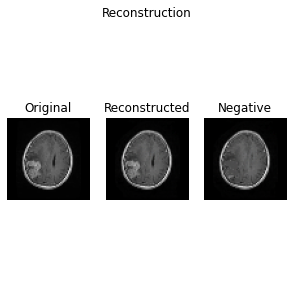

E: 186
tensor([[0.3052, 0.6948]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4529, 0.5471]], grad_fn=<SoftmaxBackward0>)


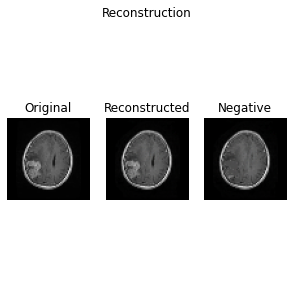

E: 187
tensor([[0.2773, 0.7227]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4369, 0.5631]], grad_fn=<SoftmaxBackward0>)


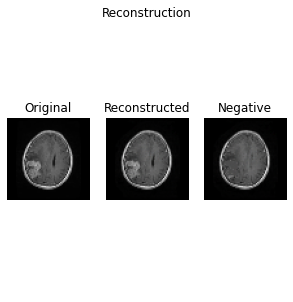

E: 188
tensor([[0.3094, 0.6906]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4588, 0.5412]], grad_fn=<SoftmaxBackward0>)


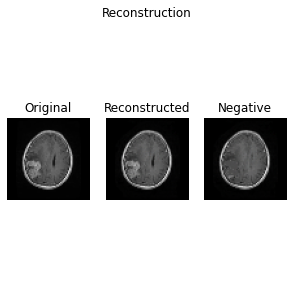

E: 189
tensor([[0.3101, 0.6899]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4651, 0.5349]], grad_fn=<SoftmaxBackward0>)


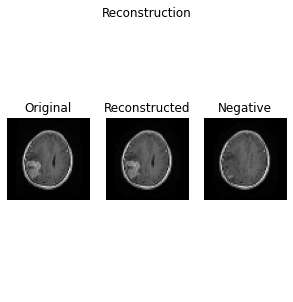

E: 190
tensor([[0.2902, 0.7098]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4429, 0.5571]], grad_fn=<SoftmaxBackward0>)


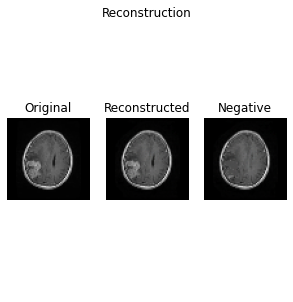

E: 191
tensor([[0.2703, 0.7297]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4342, 0.5658]], grad_fn=<SoftmaxBackward0>)


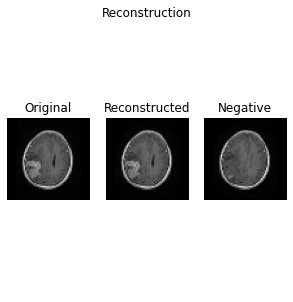

E: 192
tensor([[0.3449, 0.6551]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4843, 0.5157]], grad_fn=<SoftmaxBackward0>)


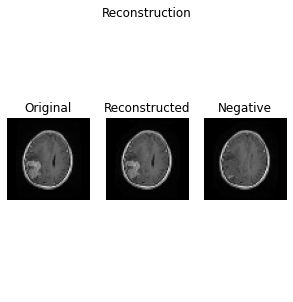

E: 193
tensor([[0.2867, 0.7133]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4614, 0.5386]], grad_fn=<SoftmaxBackward0>)


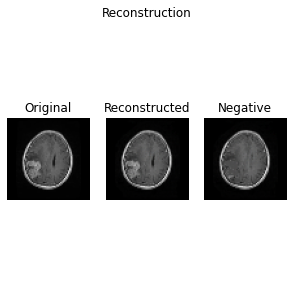

E: 194
tensor([[0.2754, 0.7246]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4244, 0.5756]], grad_fn=<SoftmaxBackward0>)


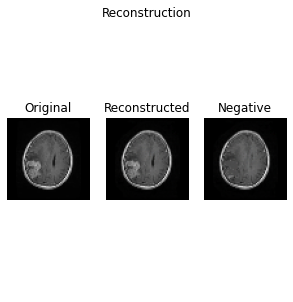

E: 195
tensor([[0.2928, 0.7072]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4500, 0.5500]], grad_fn=<SoftmaxBackward0>)


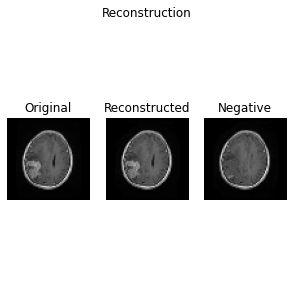

E: 196
tensor([[0.3541, 0.6459]], grad_fn=<SoftmaxBackward0>)
tensor([[0.5083, 0.4917]], grad_fn=<SoftmaxBackward0>)


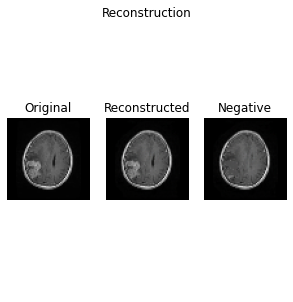

E: 197
tensor([[0.2492, 0.7508]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4219, 0.5781]], grad_fn=<SoftmaxBackward0>)


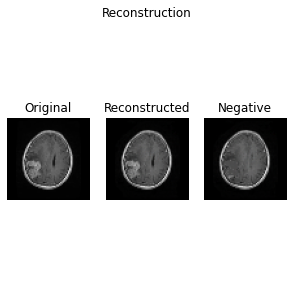

E: 198
tensor([[0.2774, 0.7226]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3995, 0.6005]], grad_fn=<SoftmaxBackward0>)


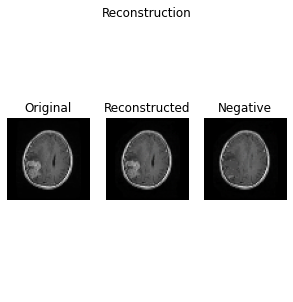

E: 199
tensor([[0.3082, 0.6918]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4717, 0.5283]], grad_fn=<SoftmaxBackward0>)


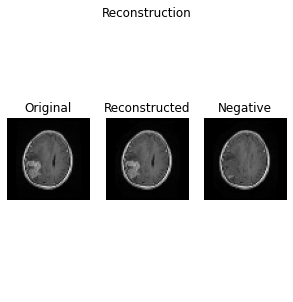

E: 200
tensor([[0.3512, 0.6488]], grad_fn=<SoftmaxBackward0>)
tensor([[0.5342, 0.4658]], grad_fn=<SoftmaxBackward0>)


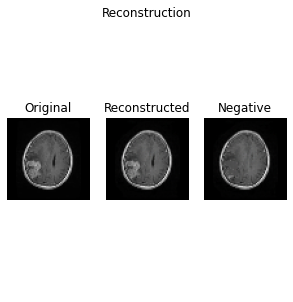

E: 201
tensor([[0.2044, 0.7956]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3572, 0.6428]], grad_fn=<SoftmaxBackward0>)


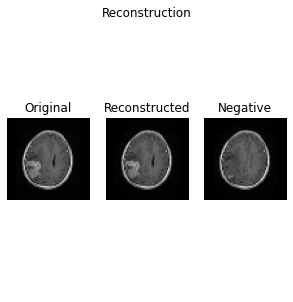

E: 202
tensor([[0.3036, 0.6964]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3738, 0.6262]], grad_fn=<SoftmaxBackward0>)


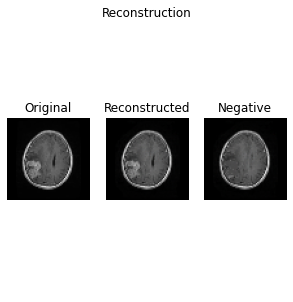

tensor([[0.3200, 0.6800]], grad_fn=<SoftmaxBackward0>)
tensor([[0.5164, 0.4836]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3200, 0.6800]], grad_fn=<SoftmaxBackward0>)
tensor([[0.5164, 0.4836]], grad_fn=<SoftmaxBackward0>)


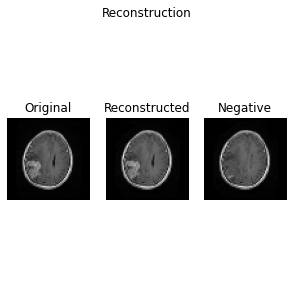

In [146]:
gen.train()
init_noisez1.detach()
init_noisez2.detach()
optim = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))  
for epoch in range(0,10000):
    image = next(iter(test_loader))
    original_image = image[0][0]
    optim.zero_grad()
    
    sample1 = gen(init_noisez1,init_noisez2 ).to(device)
    sample1 = (sample1.reshape([1,3,64,64]))
    #sample1 = torchvision.transforms.Grayscale()(sample1)
    #sample1 = torch.cat([sample1,sample1,sample1], 1)
    
    result1,_ = classifier(sample1) 
    clf1, _ = classifier(image[0].to(device))
    prob = result1[0,1]
    
    class_loss = torch.nn.BCELoss()(prob, clf1[0,1])
    
    original_image =  (original_image.reshape([1,3,64,64]))
    
    loss = 10*torch.mean((original_image - sample1)**2)#+class_loss
    
    loss.backward()
    optim.step()
    
    
#     #negative
    
    image = next(iter(test_loader))
    original_image = (image[0][0].to(device))
    
    
    mask = torch.zeros([3,64,64]).to(device)
    mask[:, 34:45, 15:26] = 1
    mask[:, 28:40, 34:38] = 1
    masked_im = (mask*original_image).cpu().numpy()#.view(3, 64, 64)

    masked_im[:, 28:40, 34:38] = np.where(masked_im[:, 28:40, 34:38]<-0.5, -0.3, masked_im[:, 28:40, 34:38])
    masked_im[:, 34:45, 15:26] = np.where(masked_im[:, 34:45, 15:26]>-0.2, -0.4, masked_im[:, 34:45, 15:26])

    masked_im = torch.from_numpy(masked_im)
    masked_im = masked_im.view(1,3,64,64)
    result,_ = classifier(masked_im) 
    masked_im = masked_im[0]
    #masked_im = (np.transpose(masked_im,(1,2,0))+1)/2
    ref_im = original_image
    ref_im[:, 28:40, 34:38] = torch.Tensor(masked_im[:, 28:40, 34:38])
    ref_im[:, 34:45, 15:26] = torch.Tensor(masked_im[:, 34:45, 15:26])
    
    
    
    
    
    
    
    
    
    

#     mask = torch.zeros([3,64,64]).to(device)
#     mask[:, 34:45, 15:26] = 1
#     masked_im = (mask*original_image).cpu().view(3, 64, 64)
#     masked_im = np.where(masked_im>-0.2, -0.4, masked_im)
#     #masked_im = (np.transpose(masked_im,(1,2,0))+1)/2
#     ref_im = original_image
#     ref_im[:, 34:45, 15:26] = torch.Tensor(masked_im[:, 34:45, 15:26])
    
    
    optim.zero_grad()
    sample2 = gen(init_noisez1,torch.zeros(1,100) ).to(device)
    sample2 = (sample2.reshape([1,3,64,64]))
    #sample2 = torchvision.transforms.Grayscale()(sample2)
    #sample2 = torch.cat([sample2,sample2,sample2], 1)
    
    result2,_ = classifier(sample2) 
    prob = result2[0,0]
    clf2,_ =  classifier(image[0]) 
    
    class_loss = torch.nn.BCELoss()(prob, clf2[0][1])

    loss =  10*torch.mean((ref_im - sample2)**2)# + class_loss

    loss.backward()
    optim.step()
    
    sample1 = gen(init_noisez1,init_noisez2 ).to(device)
    #sample1 = torchvision.transforms.Grayscale()(sample1)
    #sample1 = torch.cat([sample1,sample1,sample1], 1)
    
    sample2 = gen(init_noisez1,torch.zeros(1,100) ).to(device)
    #sample2 = torchvision.transforms.Grayscale()(sample2)
    #sample2 = torch.cat([sample2,sample2,sample2], 1)
    
    result1,_ = classifier(sample1) 
    result2,_ = classifier(sample2) 
    
     
    
    if epoch>200 and result1[0][0].item() <0.5 and result2[0][0].item()>0.5:
        print(result1)
        print(result2)
        reconstructed_image = gen(
        init_noisez1, init_noisez2
        ).detach().cpu().view(-1, 3,64, 64)
        
        reconstructed_image = reconstructed_image[0,]
        
        print(result1)
        fig=plt.figure(figsize=(5, 5))
        plt.title('Reconstruction')
        plt.axis('off')


        image = next(iter(test_loader))
        original_image = (image[0][0].to(device))

        minifig= fig.add_subplot(1, 3, 1)
        minifig.axis('off')
        minifig.title.set_text('Original' )
        original_image = original_image.cpu().view(3, 64, 64)
        original_image = (np.transpose(original_image,(1,2,0))+1)/2
        original_image = (original_image)
        plt.imshow(original_image)


        minifig= fig.add_subplot(1, 3, 2)
        minifig.title.set_text('Reconstructed')
        minifig.axis('off')
        reconstructed_image = np.transpose(reconstructed_image,(1,2,0))
        reconstructed_image = (reconstructed_image + 1)/2
        plt.imshow(reconstructed_image)

        
        
        reconstructed_image = gen(
        init_noisez1, torch.zeros(1,100)
        ).detach().cpu().view(-1, 3,64, 64)
        result,_ = classifier(reconstructed_image)
        print(result)
        reconstructed_image = reconstructed_image[0,]
        
        minifig= fig.add_subplot(1, 3, 3)
        minifig.title.set_text('Negative')
        minifig.axis('off')
        reconstructed_image = np.transpose(reconstructed_image,(1,2,0))
        reconstructed_image = (reconstructed_image + 1)/2
        plt.imshow(reconstructed_image)

        
        
        
        plt.show()
        
        break
    
    print("E:", epoch+1)#, "loss:", loss.item())
    
    
    
    if (epoch+1) % 1 == 0:
        reconstructed_image = gen(
        init_noisez1, init_noisez2
        ).detach().cpu().view(-1, 3,64, 64)
     
        #reconstructed_image = torchvision.transforms.Grayscale()(reconstructed_image)
        #reconstructed_image = torch.cat([reconstructed_image, reconstructed_image, reconstructed_image], 1)
        
        reconstructed_image = reconstructed_image[0,]
        
        print(result1)
        fig=plt.figure(figsize=(5, 5))
        plt.title('Reconstruction')
        plt.axis('off')


        image = next(iter(test_loader))
        original_image = (image[0][0].to(device))

        minifig= fig.add_subplot(1, 3, 1)
        minifig.axis('off')
        minifig.title.set_text('Original' )
        original_image = original_image.cpu().view(3, 64, 64)
        original_image = (np.transpose(original_image,(1,2,0))+1)/2
        original_image = (original_image)
        plt.imshow(original_image)


        minifig= fig.add_subplot(1, 3, 2)
        minifig.title.set_text('Reconstructed')
        minifig.axis('off')
        reconstructed_image = np.transpose(reconstructed_image,(1,2,0))
        reconstructed_image = (reconstructed_image + 1)/2
        plt.imshow(reconstructed_image)

        
        
        reconstructed_image = gen(
        init_noisez1, torch.zeros(1,100)
        ).detach().cpu().view(-1, 3,64, 64)
        
        #reconstructed_image = torchvision.transforms.Grayscale()(reconstructed_image)
        #reconstructed_image = torch.cat([reconstructed_image, reconstructed_image, reconstructed_image], 1)
        
        result,_ = classifier(reconstructed_image)
        print(result)
        reconstructed_image = reconstructed_image[0,]
        
        minifig= fig.add_subplot(1, 3, 3)
        minifig.title.set_text('Negative')
        minifig.axis('off')
        reconstructed_image = np.transpose(reconstructed_image,(1,2,0))
        reconstructed_image = (reconstructed_image + 1)/2
        plt.imshow(reconstructed_image)

        
        
        
        plt.show()

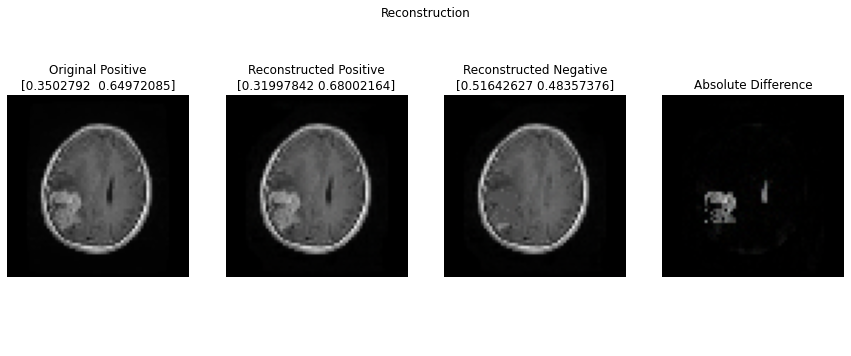

In [147]:
# Reconstructed Pos
reconstructed_image = gen(init_noisez1.cpu(), init_noisez2.cpu()).detach().cpu().view(-1, 3, 64, 64)
clfrecpos, _ = classifier(reconstructed_image)
reconstructed_image = reconstructed_image[0,]
reconstructed_image = np.transpose(reconstructed_image,(1,2,0))

# Reconstructed Neg
reconstructed_image_neg = gen(init_noisez1.cpu(), torch.zeros(1,100)).detach().cpu().view(-1, 3, 64, 64)
clfrecneg, _ = classifier(reconstructed_image_neg)
reconstructed_image_neg = reconstructed_image_neg[0,]
reconstructed_image_neg = np.transpose(reconstructed_image_neg,(1,2,0))



#original
image = next(iter(test_loader))
original_image = image[0][0].view(-1,3,64,64).cpu()
clforiginal, _ = classifier(original_image)
original_image = (np.transpose(original_image[0,],(1,2,0))+1)/2





z2_features_reconstructed = abs(reconstructed_image - reconstructed_image_neg)#/reconstructed_image


fig=plt.figure(figsize=(15, 6))
plt.title('Reconstruction')
plt.axis('off')




minifig= fig.add_subplot(1, 4, 1)
minifig.axis('off')
minifig.title.set_text('Original Positive\n' + str(clforiginal.detach().cpu().numpy()[0]))
plt.imshow(original_image)




minifig= fig.add_subplot(1, 4, 2)
minifig.title.set_text('Reconstructed Positive\n' +str(clfrecpos.detach().cpu().numpy()[0] ))
minifig.axis('off')
reconstructed_image = (reconstructed_image + 1)/2
plt.imshow(reconstructed_image)







minifig= fig.add_subplot(1, 4, 3)
minifig.title.set_text('Reconstructed Negative\n'+str(clfrecneg.detach().cpu().numpy()[0]))
minifig.axis('off')
reconstructed_image_neg = (reconstructed_image_neg + 1)/2
plt.imshow(reconstructed_image_neg)



minifig= fig.add_subplot(1, 4, 4)
minifig.title.set_text('Absolute Difference')
minifig.axis('off')
z2_features_reconstructed = (z2_features_reconstructed) #+ 1)/2
#z2_features_reconstructed = z2_features_reconstructed/torch.max(z2_features_reconstructed)
#z2_features_reconstructed = np.where(z2_features_reconstructed<0,0, z2_features_reconstructed)
plt.imshow(z2_features_reconstructed)









plt.show()

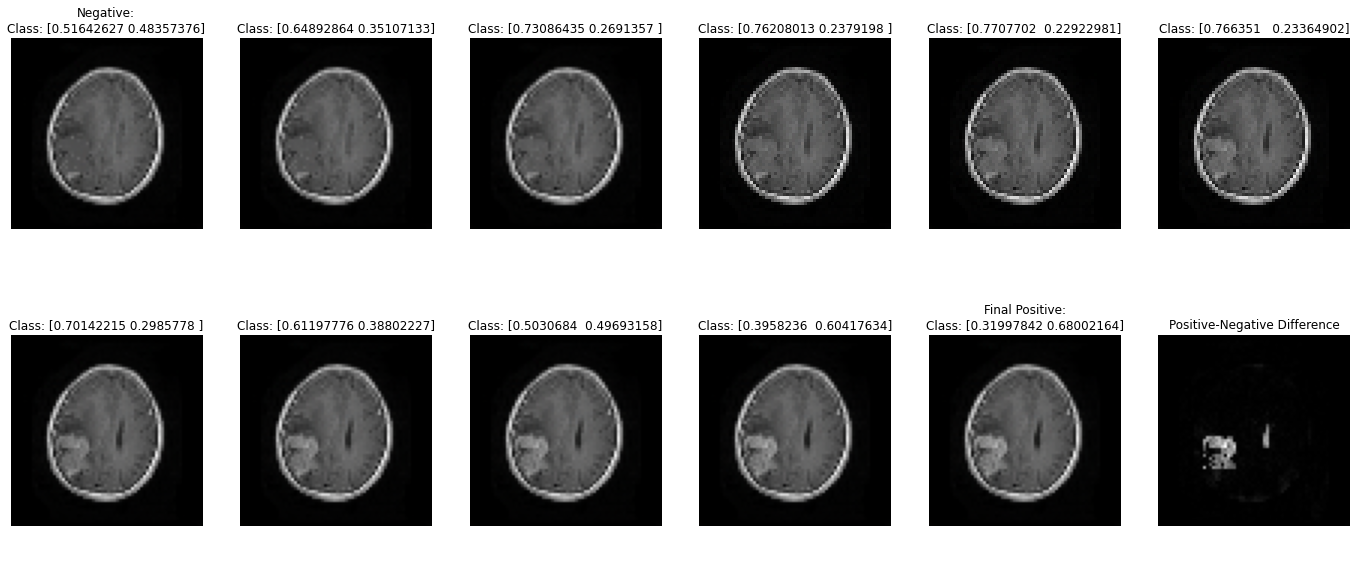

In [153]:
delta = 0.1

fig=plt.figure(figsize=(24, 10))
#plt.title('Latent Space Interpolation')
#fig.suptitle('Latent Space Interpolation', fontsize=20)
plt.axis('off')


for i in range(11):
    minifig= fig.add_subplot(2, 6, i+1)
    image = gen(init_noisez1.cpu(), delta*i*init_noisez2.cpu()).detach().cpu().view(-1, 3, 64, 64)
    class_result,_ = classifier(image)
    class_result = class_result.detach().numpy()
    minifig.axis('off')
    
    if (i==0):
        minifig.title.set_text("Negative:"+"\n"+"Class: "+str(class_result[0]))
    elif (i==10):
        minifig.title.set_text("Final Positive:"+"\n"+"Class: "+str(class_result[0]))
    else: 
        minifig.title.set_text("Class: "+str(class_result[0]))
    plt.imshow((np.transpose(image[0],(1,2,0))+1)/2)
   
  

 #difference image
minifig= fig.add_subplot(2, 6, 12)
minifig.title.set_text('Positive-Negative Difference')
minifig.axis('off')
pos = gen(init_noisez1.cpu(), init_noisez2.cpu()).detach().cpu().view(-1, 3, 64,64)
neg = gen(init_noisez1.cpu(), torch.zeros(1,100)).detach().cpu().view(-1, 3,64, 64)
diffimg = 3*abs(pos - neg)
diffimg = np.transpose(diffimg[0], (1,2,0))
diffimg = np.dot(diffimg[...,:3], [0.2989, 0.5870, 0.1140])
plt.imshow(diffimg, cmap = "gray");



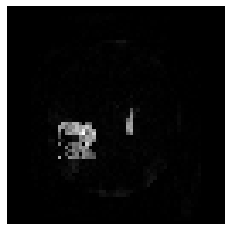

In [175]:
delta = 0.01

#fig=plt.figure(figsize=(24, 10))
#plt.title('Latent Space Interpolation')
#fig.suptitle('Latent Space Interpolation', fontsize=20)
#plt.axis('off')


for i in range(100):
    #minifig= fig.add_subplot(2, 6, i+1)
    image = gen(init_noisez1.cpu(), delta*i*init_noisez2.cpu()).detach().cpu().view(-1, 3, 64, 64)
    class_result,_ = classifier(image)
    class_result = class_result.detach().numpy()
    minifig.axis('off')
    
    #if (i==0):
    #    minifig.title.set_text("Negative:"+"\n"+"Class: "+str(class_result[0]))
    #elif (i==10):
    #    minifig.title.set_text("Final Positive:"+"\n"+"Class: "+str(class_result[0]))
    #else: 
    #    minifig.title.set_text("Class: "+str(class_result[0]))
    image =(image[0]+1)/2
    image = torchvision.transforms.Grayscale()(image)
    image = np.transpose(image, (1,2,0))
    plt.imshow(image, cmap = "gray")
    plt.axis("off")
    plt.savefig("brain_"+str(i)+".jpg", bbox_inches='tight')
    

 #difference image
minifig= fig.add_subplot(2, 6, 12)
minifig.title.set_text('Positive-Negative Difference')
minifig.axis('off')
pos = gen(init_noisez1.cpu(), init_noisez2.cpu()).detach().cpu().view(-1, 3, 64,64)
neg = gen(init_noisez1.cpu(), torch.zeros(1,100)).detach().cpu().view(-1, 3,64, 64)
diffimg = 3*abs(pos - neg)
diffimg = np.transpose(diffimg[0], (1,2,0))
diffimg = np.dot(diffimg[...,:3], [0.2989, 0.5870, 0.1140])
plt.imshow(diffimg, cmap = "gray");
plt.axis("off")
plt.savefig("brain_diff.jpg", bbox_inches='tight')



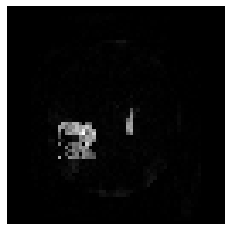

In [166]:
delta = 0.1

#fig=plt.figure(figsize=(24, 10))
#plt.title('Latent Space Interpolation')
#fig.suptitle('Latent Space Interpolation', fontsize=20)
#plt.axis('off')


for i in range(11):
    
    image = gen(init_noisez1.cpu(), delta*i*init_noisez2.cpu()).detach().cpu().view(-1, 3, 64, 64)
    class_result,_ = classifier(image)
    class_result = class_result.detach().numpy()
    plt.imshow((np.transpose(image[0],(1,2,0))+1)/2)
    plt.axis("off")
    plt.savefig("brain_"+str(i)+".jpg", bbox_inches='tight')
    
pos = gen(init_noisez1.cpu(), init_noisez2.cpu()).detach().cpu().view(-1, 3, 64,64)
neg = gen(init_noisez1.cpu(), torch.zeros(1,100)).detach().cpu().view(-1, 3,64, 64)
diffimg = 3*abs(pos - neg)
diffimg = np.transpose(diffimg[0], (1,2,0))
diffimg = np.dot(diffimg[...,:3], [0.2989, 0.5870, 0.1140])
plt.imshow(diffimg, cmap = "gray");
plt.savefig("brain_diff.jpg", bbox_inches='tight')

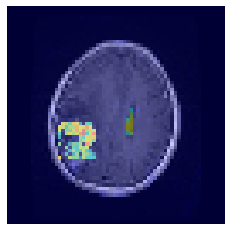

In [167]:
import cv2
from skimage import img_as_ubyte

diff = img_as_ubyte(diffimg/np.max(diffimg))

heatmap_img = cv2.applyColorMap(diff, cv2.COLORMAP_JET)
superimposed_img = heatmap_img * 0.002 + original_image.numpy()

final_img = superimposed_img[:,:,::-1]
final_img = final_img/np.max(final_img)
plt.imshow(final_img);
plt.axis("off")
plt.savefig("brain_heatmap.jpg", bbox_inches='tight')

### Latent Integrated Gradients

In [159]:
neg = gen(init_noisez1.cpu(), torch.zeros(1,100).cpu()).view(-1, 3, 64, 64).clone().detach().requires_grad_(True)
output,_ = classifier(neg)
target_label_idx = torch.argmax(output, 1).item()
index = np.ones((output.size()[0], 1)) * target_label_idx
index = torch.tensor(index, dtype=torch.int64)
output = output.gather(1, index)

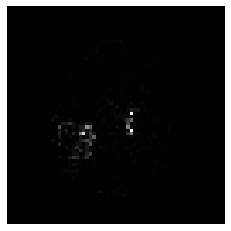

In [164]:
delta = 0.01

m = 101

mask = torch.zeros((3,64,64))

for i in range(m):
    image = gen(init_noisez1.cpu(), delta*i*init_noisez2.cpu()).detach().cpu().view(-1, 3, 64, 64).clone().detach().requires_grad_(True)
    output,_ = classifier(image)
    
    target_label_idx = torch.argmax(output, 1).item()
    index = np.ones((output.size()[0], 1)) * target_label_idx
    index = torch.tensor(index, dtype=torch.int64)
    output = output.gather(1, index)
    
    classifier.zero_grad()
    output.backward()
    mask = (mask+image.grad[0])
    minifig.axis('off')
    
diffimg = pos - neg
final_mask = diffimg[0] * (mask/m)
final_mask = final_mask/torch.max(final_mask).item()
final_mask = final_mask.detach().numpy()
final_mask = (np.transpose(final_mask,(1,2,0)))
final_mask = np.dot(final_mask[...,:3], [0.2989, 0.5870, 0.1140])
plt.imshow(5*abs(final_mask), cmap = "gray");
plt.axis("off")
plt.savefig("brain_LIG.jpg", bbox_inches='tight')

tensor([[0.9241, 0.0759]], grad_fn=<SoftmaxBackward0>)


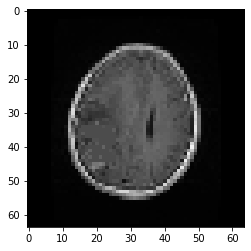

In [55]:
classifier.eval()
image = next(iter(test_loader))
original_image = (image[0][0].to(device))

mask = torch.zeros([3,64,64]).to(device)
mask[:, 34:45, 15:26] = 1
masked_im = (mask*original_image).cpu().view(3, 64, 64)
masked_im = np.where(masked_im>-0.2, -0.4, masked_im)
masked_im = torch.from_numpy(masked_im)
masked_im = masked_im.view(1,3,64,64)
result,_ = classifier(masked_im) 
print(result)
masked_im = masked_im[0]
#masked_im = (np.transpose(masked_im,(1,2,0))+1)/2
ref_im = original_image
ref_im[:, 34:45, 15:26] = torch.Tensor(masked_im[:, 34:45, 15:26])
plt.imshow((np.transpose(ref_im, (1,2,0))+1)/2)


(3, 64, 64)
tensor([[0.8971, 0.1029]], grad_fn=<SoftmaxBackward0>)


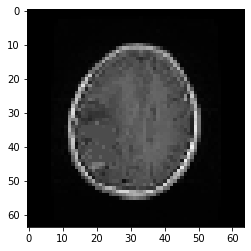

In [109]:
classifier.eval()
image = next(iter(test_loader))
original_image = (image[0][0].to(device))

mask = torch.zeros([3,64,64]).to(device)
mask[:, 34:45, 15:26] = 1
mask[:, 28:40, 34:38] = 1
masked_im = (mask*original_image).cpu().numpy()#.view(3, 64, 64)

masked_im[:, 28:40, 34:38] = np.where(masked_im[:, 28:40, 34:38]<-0.5, -0.3, masked_im[:, 28:40, 34:38])
masked_im[:, 34:45, 15:26] = np.where(masked_im[:, 34:45, 15:26]>-0.2, -0.4, masked_im[:, 34:45, 15:26])

masked_im = torch.from_numpy(masked_im)
masked_im = masked_im.view(1,3,64,64)
result,_ = classifier(masked_im) 
masked_im = masked_im[0]
#masked_im = (np.transpose(masked_im,(1,2,0))+1)/2
ref_im = original_image
ref_im[:, 28:40, 34:38] = torch.Tensor(masked_im[:, 28:40, 34:38])
ref_im[:, 34:45, 15:26] = torch.Tensor(masked_im[:, 34:45, 15:26])
plt.imshow((np.transpose(ref_im, (1,2,0))+1)/2)
